# Imports

In [93]:
#manipulação de dados
import pandas as pd
import numpy  as np

#webscrapling
from urllib.request import urlretrieve

#processamento de dados
import inflection
from pandas_profiling import ProfileReport

#visualização
import matplotlib.pyplot as plt
import seaborn           as sns
from IPython.core.display import HTML
from IPython.display      import Image

from scipy import stats


# processamento de dados
from sklearn.preprocessing   import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble        import RandomForestRegressor, ExtraTreesClassifier
from boruta                  import BorutaPy
from sklearn.model_selection import train_test_split
import pickle

## Helper functions

In [2]:
# configuração do jupyter notebook e plotagem de imagens
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def cramer_v(x,y):
  cm = pd.crosstab(x,y).values

  n = cm.sum()
  r, k = cm.shape

  chi2 = stats.chi2_contingency(cm)[0]
  chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
  kcorr = k- (k-1)**2/(n-1)
  rcorr = r- (r-1)**2/(n-1)
  return np.sqrt((chi2/n)/(min(kcorr-1,rcorr-1)))

# 1.0 Load data 

## 1.1 Get data from github

In [5]:
# url = 'https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv'

In [6]:
# path_local = 'C:/Users/Lavin/Documents/desafios/ifood/'
# filepath = path_local + 'data/raw/data_ifood_raw.csv'
# urlretrieve(url,filepath)# 

## 1.2 Load from local 

In [7]:
path_local = 'C:/Users/Lavin/Documents/desafios/ifood/'
data_raw = pd.read_csv(path_local + 'data/raw/data_ifood_raw.csv')

In [8]:
data_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### 1.2.1 Data dimensions

In [9]:
data_raw.shape

(2240, 29)

Temos um total de 2240 linhas e 29 colunas

In [10]:
#colunas antigas
old_cols = data_raw.columns
#função auxiliar
snakecase = lambda x: inflection.underscore(x)
# tranformando os nomes das colunas antigas em padrão snake_case
new_cols = list(map(snakecase,old_cols))

# renomeando as colunas
data_raw.columns = new_cols

### 1.2.2 Checking data types

In [11]:
data_raw.dtypes

id                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
mnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_store_purchases        int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
z_cost_contact             int64
z_revenue                  int64
response                   int64
dtype: object

**changing the variable 'dt_costumer' to datatime type**

In [12]:
data_raw['dt_customer'] = pd.to_datetime(data_raw['dt_customer'])

###  1.2.3 Checking NA values

In [13]:
data_raw.isnull().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

Neste primeiro momento os valores nulos serão deletados

In [14]:
data_raw = data_raw.dropna()

#  2.0 Descriptive statistical

In [15]:
df1 = data_raw.copy()

'ID' : categorical statistics

'Year_Birth': numerical statistics

'Education': categorical statistics

'Marital_Status': categorical statistics

'Income': numerical statistics

'Kidhome': numerical statistics

'Teenhome': numerical statistics

'Dt_Customer': numerical statistics

'Recency': numerical statistics

'MntWines': numerical statistics

'MntFruits': numerical statistics

'MntMeatProducts': numerical statistics

'MntFishProducts': numerical statistics

'MntSweetProducts': numerical statistics

'MntGoldProds': numerical statistics

'NumDealsPurchases': numerical statistics

'NumWebPurchases': numerical statistics

'NumCatalogPurchases': numerical statistics

'NumStorePurchases': numerical statistics

'NumWebVisitsMonth': numerical statistics

'AcceptedCmp3': categorical statistics

'AcceptedCmp4': categorical statistics

'AcceptedCmp5': categorical statistics

'AcceptedCmp1': categorical statistics

'AcceptedCmp2': categorical statistics

'Complain': categorical statistics

'Z_CostContact': numerical statistics

'Z_Revenue': numerical statistics

'Response': categorical statistics

In [16]:
# divisão dos dados em dois dataframes, um categórico e outro numérico
num_atributtes = df1[['year_birth', 'income','kidhome', 'teenhome',
                      'recency','mnt_wines', 'mnt_fruits',
                      'mnt_meat_products', 'mnt_fish_products','mnt_sweet_products', 'mnt_gold_prods',
                      'num_deals_purchases', 'num_web_purchases','num_catalog_purchases', 'num_store_purchases',
                      'num_web_visits_month', 'z_cost_contact','z_revenue']]
cat_atributtes = df1[['id','education','marital_status',
                      'accepted_cmp3','accepted_cmp4','accepted_cmp5',
                      'accepted_cmp1','accepted_cmp2','complain','response']]

**Separando os dados em categoricos ou númericos para análise**

**Dividing the data into categorical or numerical to analysis**


## 2.1 Numerical Statistics

In [17]:
# estátisticas descritivas
num_statistics = num_atributtes.agg(['min','max','mean','median','std','skew','kurtosis']).T
num_statistics['range'] = num_statistics['max'] - num_statistics['min']
num_statistics = num_statistics[['max','min','range','mean','median','std','skew','kurtosis']]
num_statistics

,max,min,range,mean,median,std,skew,kurtosis
year_birth,1996.0,1893.0,103.0,1968.820397,1970.0,11.985554,-0.353661,0.734670
income,666666.0,1730.0,664936.0,52247.251354,51381.5,25173.076661,6.763487,159.636700
kidhome,2.0,0.0,2.0,0.441787,0.0,0.536896,0.635610,-0.791164
teenhome,2.0,0.0,2.0,0.505415,0.0,0.544181,0.407553,-0.989619
recency,99.0,0.0,99.0,49.012635,49.0,28.948352,0.001648,-1.199777
mnt_wines,1493.0,0.0,1493.0,305.091606,174.5,337.327920,1.170720,0.582741
mnt_fruits,199.0,0.0,199.0,26.356047,8.0,39.793917,2.101658,4.054082
mnt_meat_products,1725.0,0.0,1725.0,166.995939,68.0,224.283273,2.025577,5.055477
mnt_fish_products,259.0,0.0,259.0,37.637635,12.0,54.752082,1.916369,3.076476
mnt_sweet_products,262.0,0.0,262.0,27.028881,8.0,41.072046,2.103328,4.106141


**Um pequeno resumo das metricas de tendência central e de dispersão, durante a fase de EDA os atributos serão mais explorados para verificar seu distribuição para melhor entender a variável e sua relação com a variável resposta. Assim, já entregar algum insight importânte para o time de négocios e decidir a sua importância para o modelo**

## 2.2 Categorical Statistics 

In [18]:
# contagem de frequência
cat_atributtes.apply(lambda x: x.unique().shape[0])

id                2216
education            5
marital_status       8
accepted_cmp3        2
accepted_cmp4        2
accepted_cmp5        2
accepted_cmp1        2
accepted_cmp2        2
complain             2
response             2
dtype: int64

**O número de id's é igual a tamanho do dataset após a exclusão dos dados fantantes, então não possuimos clientes repetidos**

**The number of IDs is equal to the size of the dataset after the removal of missing data, so we do not have duplicate customers.**

<AxesSubplot: xlabel='response', ylabel='count'>

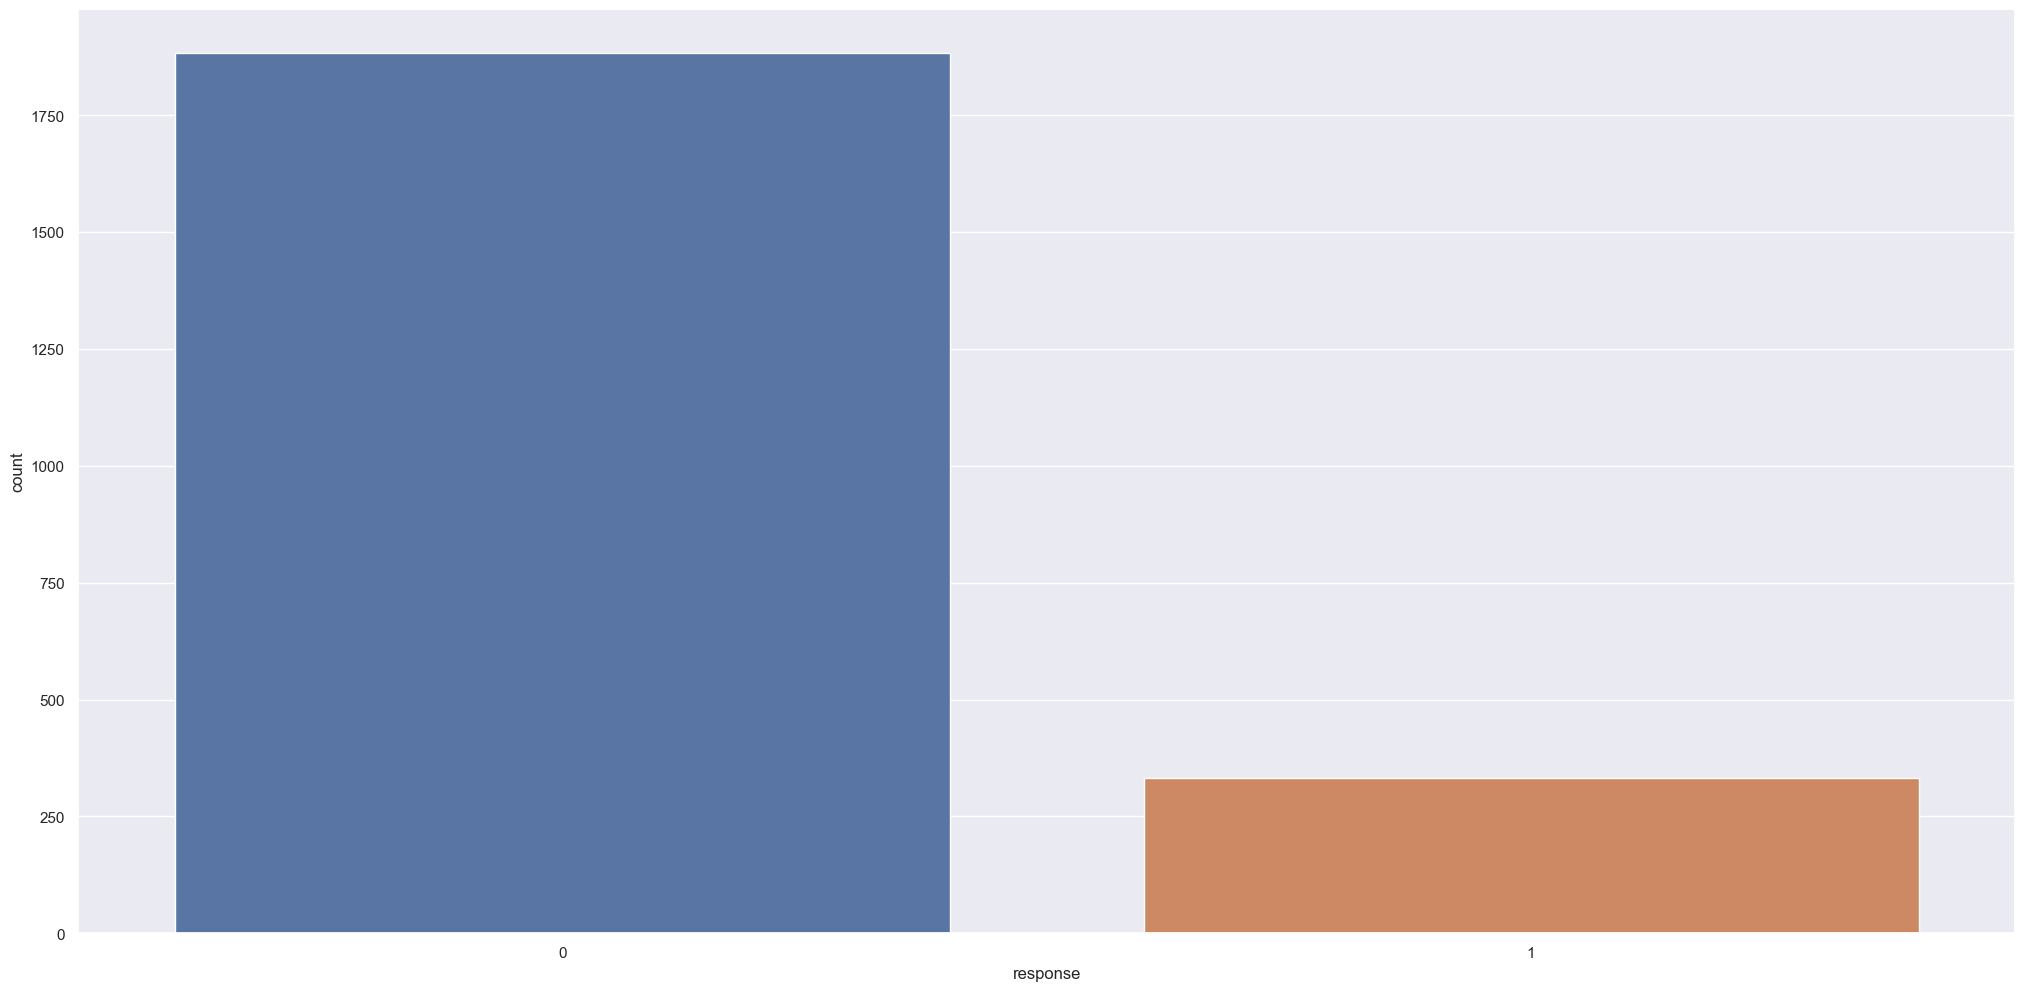

In [19]:
sns.countplot(x='response',data=cat_atributtes)

In [20]:
cat_atributtes['response'].value_counts(normalize=True)

0    0.849729
1    0.150271
Name: response, dtype: float64

**o problema trata-se de um classificação desbalanceada, com a classe majoritária com quase 85% de todo dataset**

# 3.0 Feature Engineering 

In [21]:
df2 = df1.copy()

## 3.1 hyphoteses mind map

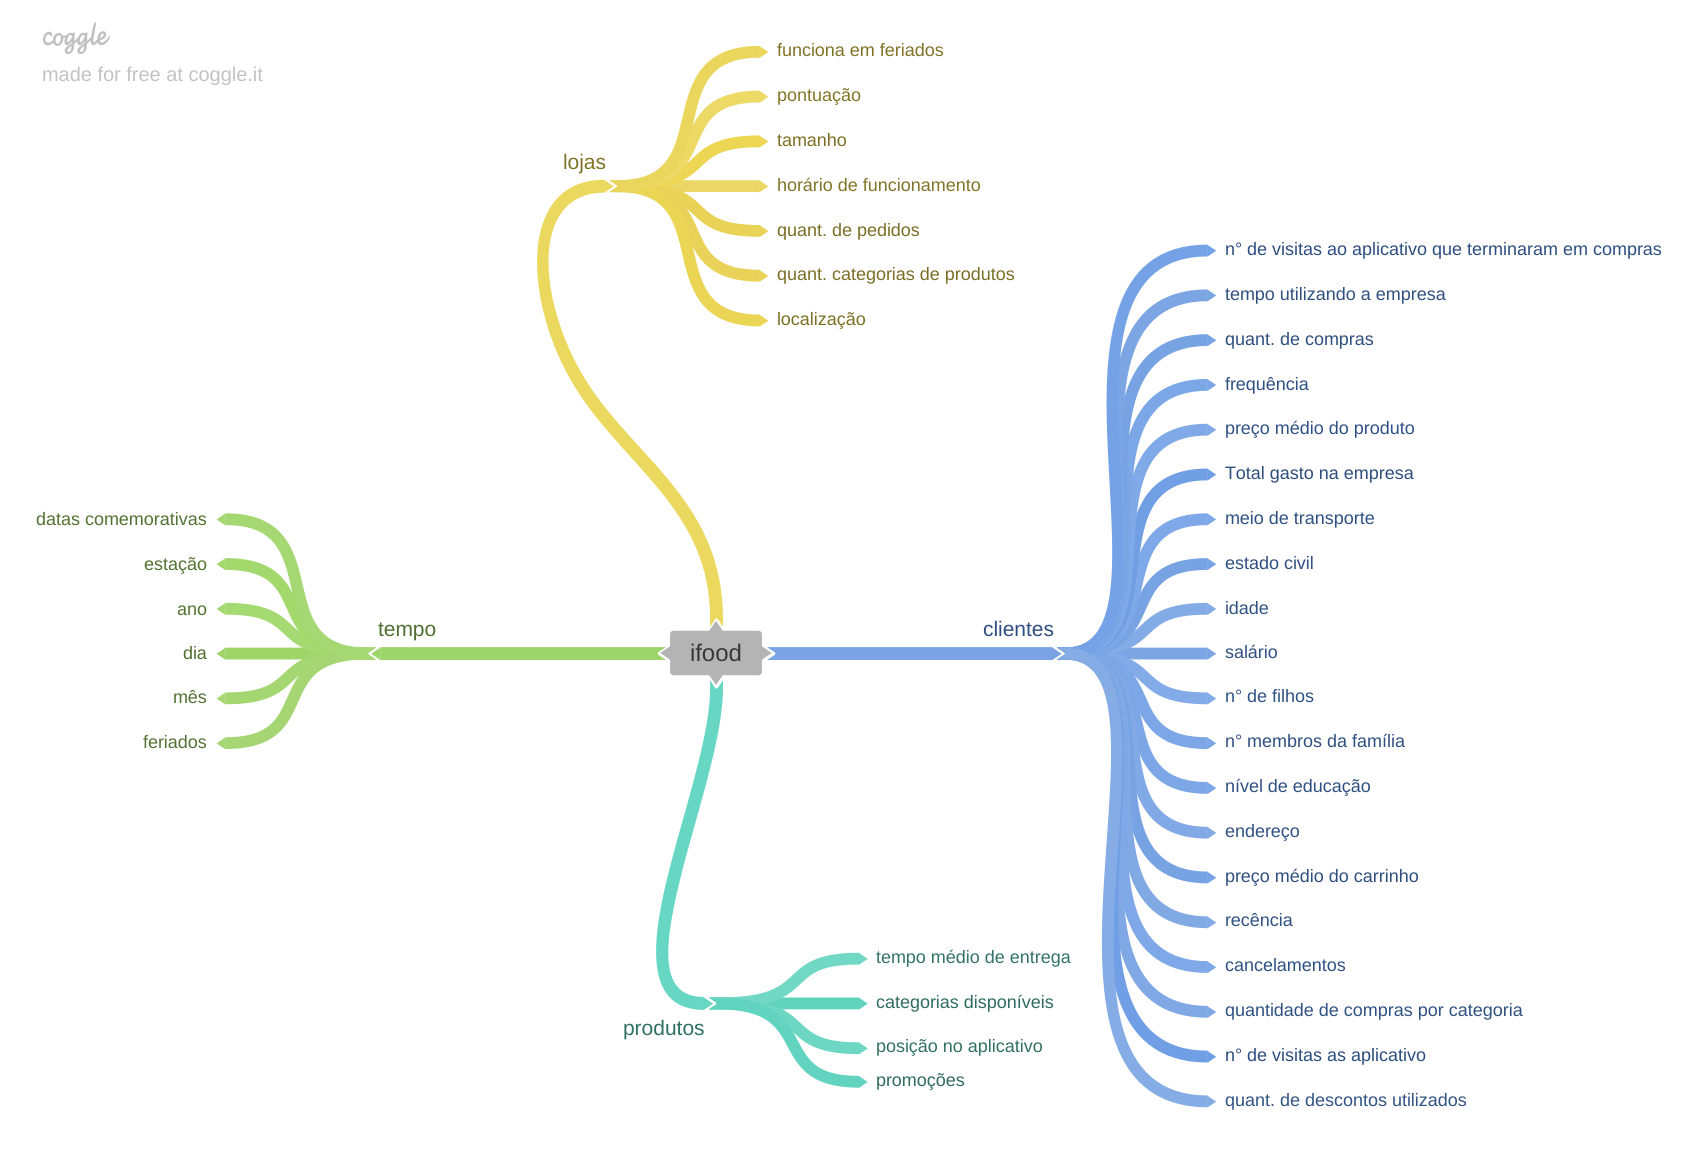

In [22]:
Image(path_local+ 'data/images/ifood.png')

## 3.2 hipoteses

### 3.2.1 hipoteses de clientes 

**h01:Clientes com salário acima da média respondem sim a pesquisa 3 vezes mais que aqueles com baixo salário**

**h02:Clientes com idade abaizo da média respodem sem a pesquisa 2 vezes mais que clientes mais velhos**

**h03:Clientes com salário acima do 70 percentil e idade abaixo do 30 percentil repondem sim a pesquisa em 70% das vezes**

**h04:clientes solteiros e divorciados respondem sim a pesquisa 1,5 vezes mais que aqueles casados**

**h05: Clientes com reclamações respondem sim as questionário 50% menos**

**h06: Clientes a mais de 1 ano na empresa respondem que sim 30% a mais que clientes novos**

**h07: Clientes com numero de compras feitas pela internet maiores que em lojas físicas respondem sim 20% a mais**

**h08: Clientes com um total gasto maior que a mediana respodem a pesquisa 50% vezes mais**

**h09: Clientes que recusaram as 3 primeiras ofertas respodem não ao questionário**

**h10: Clientes com mais filhos adolecentes respodem que sim a oferta 30% a mais**

**h10: Clientes com mais de 3 filhos repondem que não a oferta**

**h11: Clientes que 30% dos gastos deles correspondem a produtos 'gold' respodem que sim a oferta**

**h12: Clientes que tem aceitaram a oferta de 3 a 4 vezes responderam sim a ultima campanha**

**h13: clientes que o total gastos em produtos está acima do 90 percentil representam 50% das resposta positivas**

**h14: Clientes que o numero de compras com desconto está cima do 70 percentil responde que sim 20% a mais que os que estão abaixo**

**h15: Clientes que a renda por mebro da familia está acima da mediana respone que sim a oferta 30% a mais**

## 3.3 Feature engineering 

**age**

In [23]:
df2['age'] = 2020 - df2['year_birth'] 

**number of family members**

In [24]:
#função auxiliar para somar o numero de mebros da familia
def calculate_family_members(row):
    #soma o numero de filhos
    n_family_members = row['kidhome'] + row['teenhome']
    #soma + 2 para casado e junto e +1 para outros casos
    if row["marital_status"] == "Married" or row["marital_status"] == "Together":
        n_family_members += 2
    else:
        n_family_members +=1
        
    #retorna o valor
    return n_family_members

df2["n_family_members"] = df2.apply(calculate_family_members, axis=1)

**Numbers of sons**

In [25]:
df2['n_sons'] = df2['kidhome'] + df2 ['teenhome']

**days_since_signup**

In [26]:
#definindo a data da ultima atualização dos dados
date_last_update = datetime.datetime.strptime("29/06/2014", "%d/%m/%Y").date()
#criando a coluna com a difereça em dias entre da data de cadastro do cliente com a data de ultima atualização
df2["days_since_signup"] = df2["dt_customer"].apply(lambda x: (date_last_update - x.date()).days)

**income_per_member**

In [27]:
#renda por membro da familia
df2['income_per_member'] = df2['income']/df2['n_family_members']

**total_spent**

In [28]:
#total gasto em todas as categorias
df2['total_spent'] = df2['mnt_wines'] + df2['mnt_fruits'] + df2['mnt_meat_products'] + df2['mnt_fish_products'] + df2['mnt_sweet_products'] + df2['mnt_gold_prods']

**total_accepted**

In [29]:
#total de vezes que cliente aceitou a oferta
df2['total_accepted'] = df2['accepted_cmp3'] + df2['accepted_cmp4'] + df2['accepted_cmp5'] + df2['accepted_cmp1'] + df2['accepted_cmp2']

In [30]:
# deslocando a coluna response para ultima posição
cols = list(df2.columns)
cols.remove('response')
cols.append('response')
df2 = df2[cols]

# 4.0 EDA 

In [31]:
df3 = df2.copy()

## 4.1 Univariate analysis

**A análise de dados univariada será realizada com a biblioteca pandas profile, que gera um relátorio estátistico em html qu epode ser acessado para maiores detalhes**

In [32]:
# profile = ProfileReport(df3)
# profile.to_file('ifood_EDA.html')

**year_birth**

    - Possui outilers na parte inferior, possivelmente de erro de input, anos abaixo de 1941 serão removidos
    - a coluna será removida substituida devido a criação da coluna 'age'

**education**

    - 50% dos clientes possuem graduação

**marital_Status**

    - existem duas categorias, 'absurd' e 'YOLO' que são incompreensiveis então as linhas com esses valores serão removidas
    
**Income**
    
    - possui correlação alta com a maioria das variaveis
    - possui calda longa a direita, devido ao altos valores de income
    - valor extremo de 666666, que é mais de 4 vezes maior que o valor anterior, excluir linha devido a possivelmente ser erro de input
    
**kidhome**

    - maioria 58% dos clientes não possuem filhso crianças
    
**dt_customer**

    - Será removida com a criação da coluna 'days_since_signup'
    
**recency**

    - possui valores bem distribuidos
    
**mnt_wines**

    - Possui calda alonga da direita, com alta concentração de baixos valores
    
**mnt_fruits**

    - Possui calda alonga da direita, com alta concentração de baixos valores
    
**mnt_meat_products**

    - Possui calda alonga da direita, com alta concentração de baixos valores
    - valores extremos a partir de 1582, investigar a linha para dicidir a remoção
    
**mnt_fish_products**

    - Possui calda alonga da direita, com alta concentração de baixos valores

**mnt_sweet_products**

    - Possui calda alonga da direita, com alta concentração de baixos valores
    - Valor extremo de 262, verificar a linha para decidir a remoção
    
**mnt_gold_prods**

    - Possui calda alonga da direita, com alta concentração de baixos valores
    - Valor extremo de 321, verificar a linha para decidir a remoção
    
**num_deals_purchases**

    - Apenas uma minoria de clientes no dataset fizeram compras sem disconto

**num_web_purchases**

    - possui calda a direita
    - valores extremos a partir de '23', verificar a linha para decidir remoção

**num_catalog_purchases**

    - Possui calda a direita
    - 26 % dos clientes nunca fizeram compras em catalogo
    - valor extremo a a partir de '22', verificar a linha para decidir remoção
    
**num_store_purchases**

    - Maioria dos valores concentradas antes da mediana
    
**num_web_visits_month**

    - possui calda a direta
    - valores concentrados na média


**accept_cmpx**

    - as ofertas 1,3,4,5. possuem maioria de rejeitados == 0, com destaque para segunda oferta 2 que foi a mais rejeitas, só com 30 aceites
    
**complain**

    - Apenas uma minoria de clientes fizeram reclamações
    
**Age**

    - como foi derivada de 'year_birth' possui calda a direita devido aos outliers

**n_family_members**

    - Maioria das familias é composta de 2 a 3 membros
    
**n_sons**

    - pelo 71,6% dos clientes tem pelo menos um filho
    
**income_per_member**
    
    - Possui calda a direita, já que foi deriva de income, possuindo o mesmo outlier que será excluido
    
**total_spent**
    
    - possui calda a direita, com alta concentração de valores baixos
    
**total_accepted**

    - grande maioria, 80%, não aceitou nenhuma oferta
    - nenhum cliente aceitou as 5 ofertas
    
    
**z_cost_contact**

    - Valor constante de 3, será removida por não trazer informação ao modelo
    
**z_revenue**

    - Valor constante de 11, será removida por não trazer informação ao modelo
    
**response**

    - Desbalanceada com 85% de casos negativos

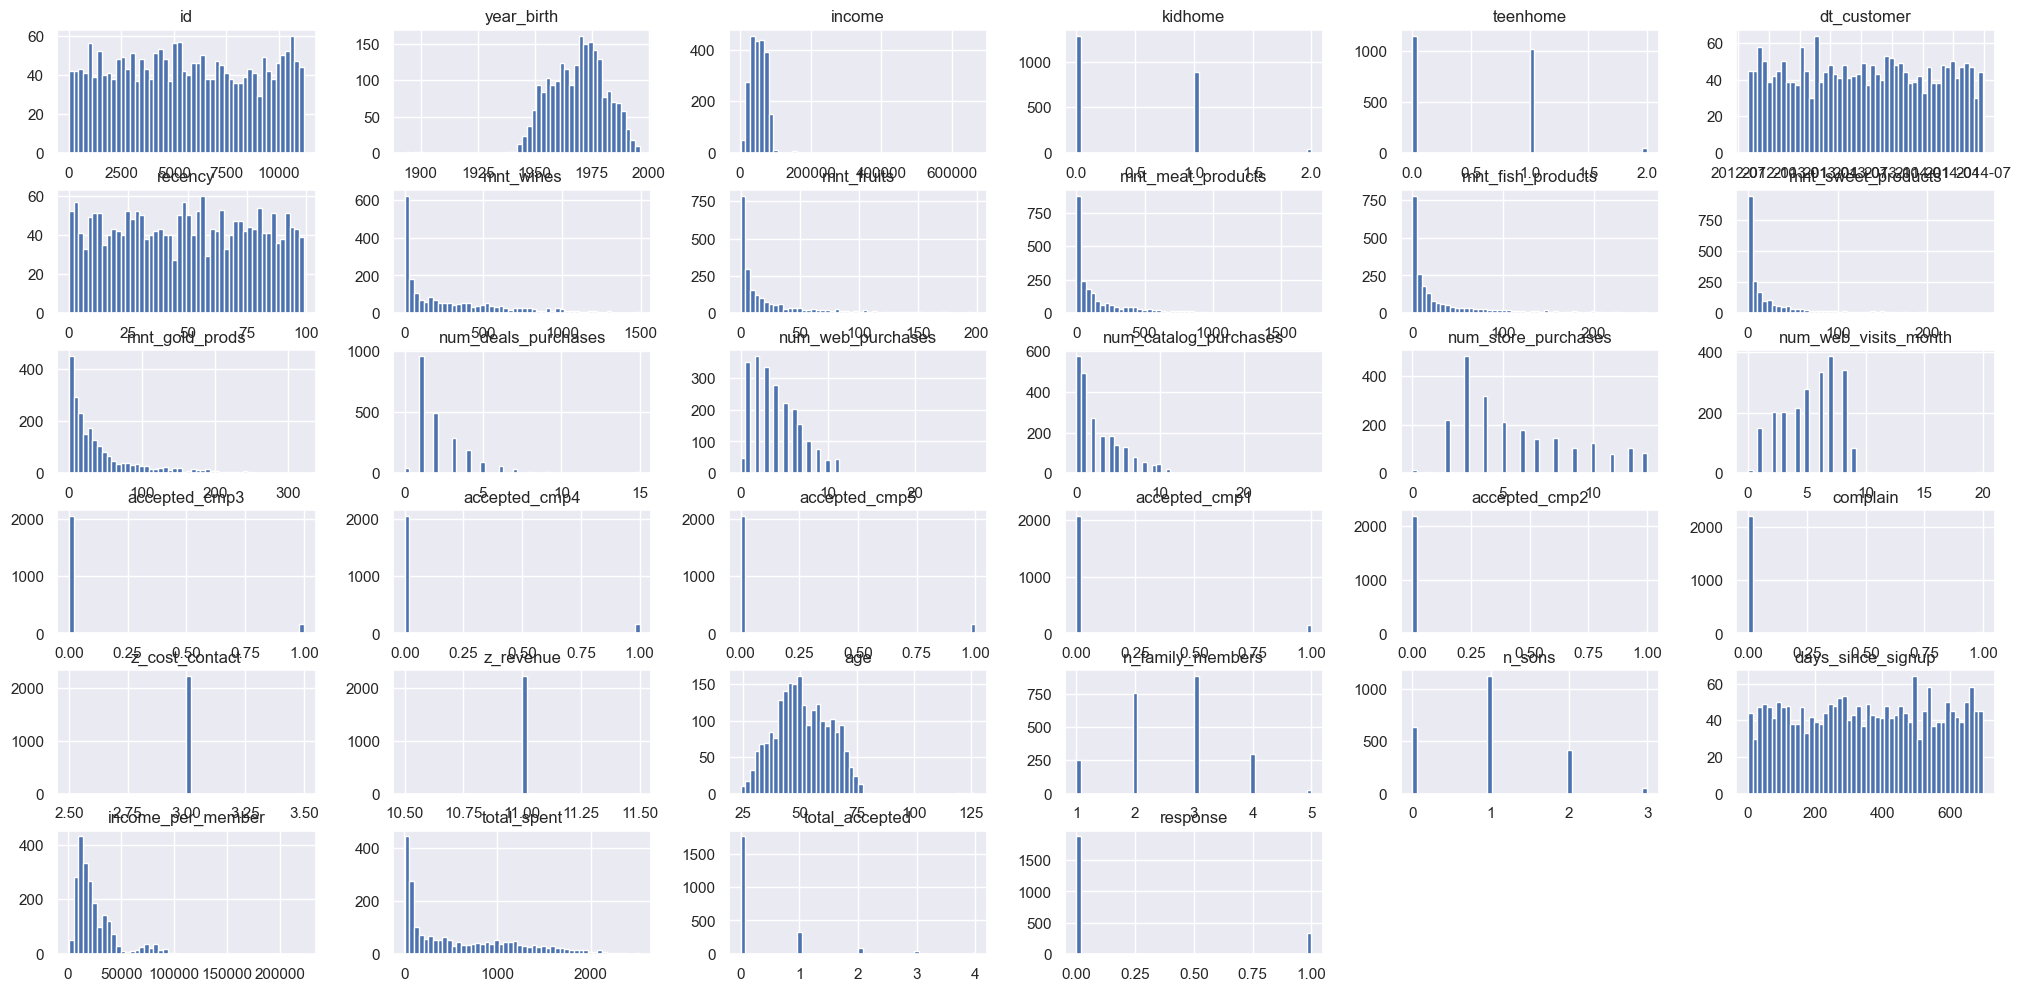

In [33]:
df3.hist(bins =50);

## 4.2 Filtragem 

**Como alguns valores de outilers podem afetar a análise bivariada dos componentes serão removidos**

In [34]:
df3 = df3[~df3['income'].isin([666666.0])]

df3 = df3[~df3['marital_status'].isin(['Absurd','YOLO'])]

df3 = df3.loc[df3['year_birth'] >= 1940,:]

df3 = df3.loc[df3['mnt_meat_products']<1582,:]

In [35]:
# a variável num_catalog_purchases com valores extremos foi investigada e foi decidida a remoção de valores acima de 1582
#df3[df3['mnt_meat_products']>=1582]

In [36]:
# a variável num_catalog_purchases com valores extremos foi investigada e foi decidida a remoção de valores acima de 22
#df3[df3['num_catalog_purchases']>=22]

In [37]:
# a variavel mnt_gold_prods com valor extremo foi investigada e não há necessidade de remoção
#df3[df3['mnt_gold_prods']>241].sort_values(by='income',ascending=False)

In [38]:
# a variavel num_web_purchases com valor extremo foi investigada e não há necessidade de remoção
#df3[df3['num_web_purchases']>=23].sort_values(by='income',ascending=False)

# 4.2 Bivariate analysis

### h01:Clientes com salário acima da média respondem sim a pesquisa 3 vezes mais que aqueles com baixo salário

In [39]:
#criando dataframe com os dados significantes para a hipotese
h01 = df3[['income','response']]

#média da renda
mean_income = h01['income'].mean()

#coluna com identificação de renda abaixo e acima da média
h01['mean'] = h01['income'].apply(lambda x: 'Above' if x > mean_income else 'below')

# agrupando e somando os variavle por valores acima e abaixo da média e por resposta negativa e positiva
h01 = h01.groupby(['mean','response']).size().reset_index()

#soma total da contagem de valores de resposta acima da média
above_total = h01[h01['mean']=='Above'][0].sum()
#soma total da contagem de valores de resposta abaixo da média
below_total = h01[h01['mean']=='below'][0].sum()
#fução auxiliar para calcular a porcentagem
aux_func = lambda x: x[0]/above_total if x['mean'] == 'Above' else x[0]/below_total if x['mean'] == 'below' else 0

#aplicando a função
h01['_%'] = h01.apply(aux_func,axis=1)

<AxesSubplot: xlabel='response', ylabel='_%'>

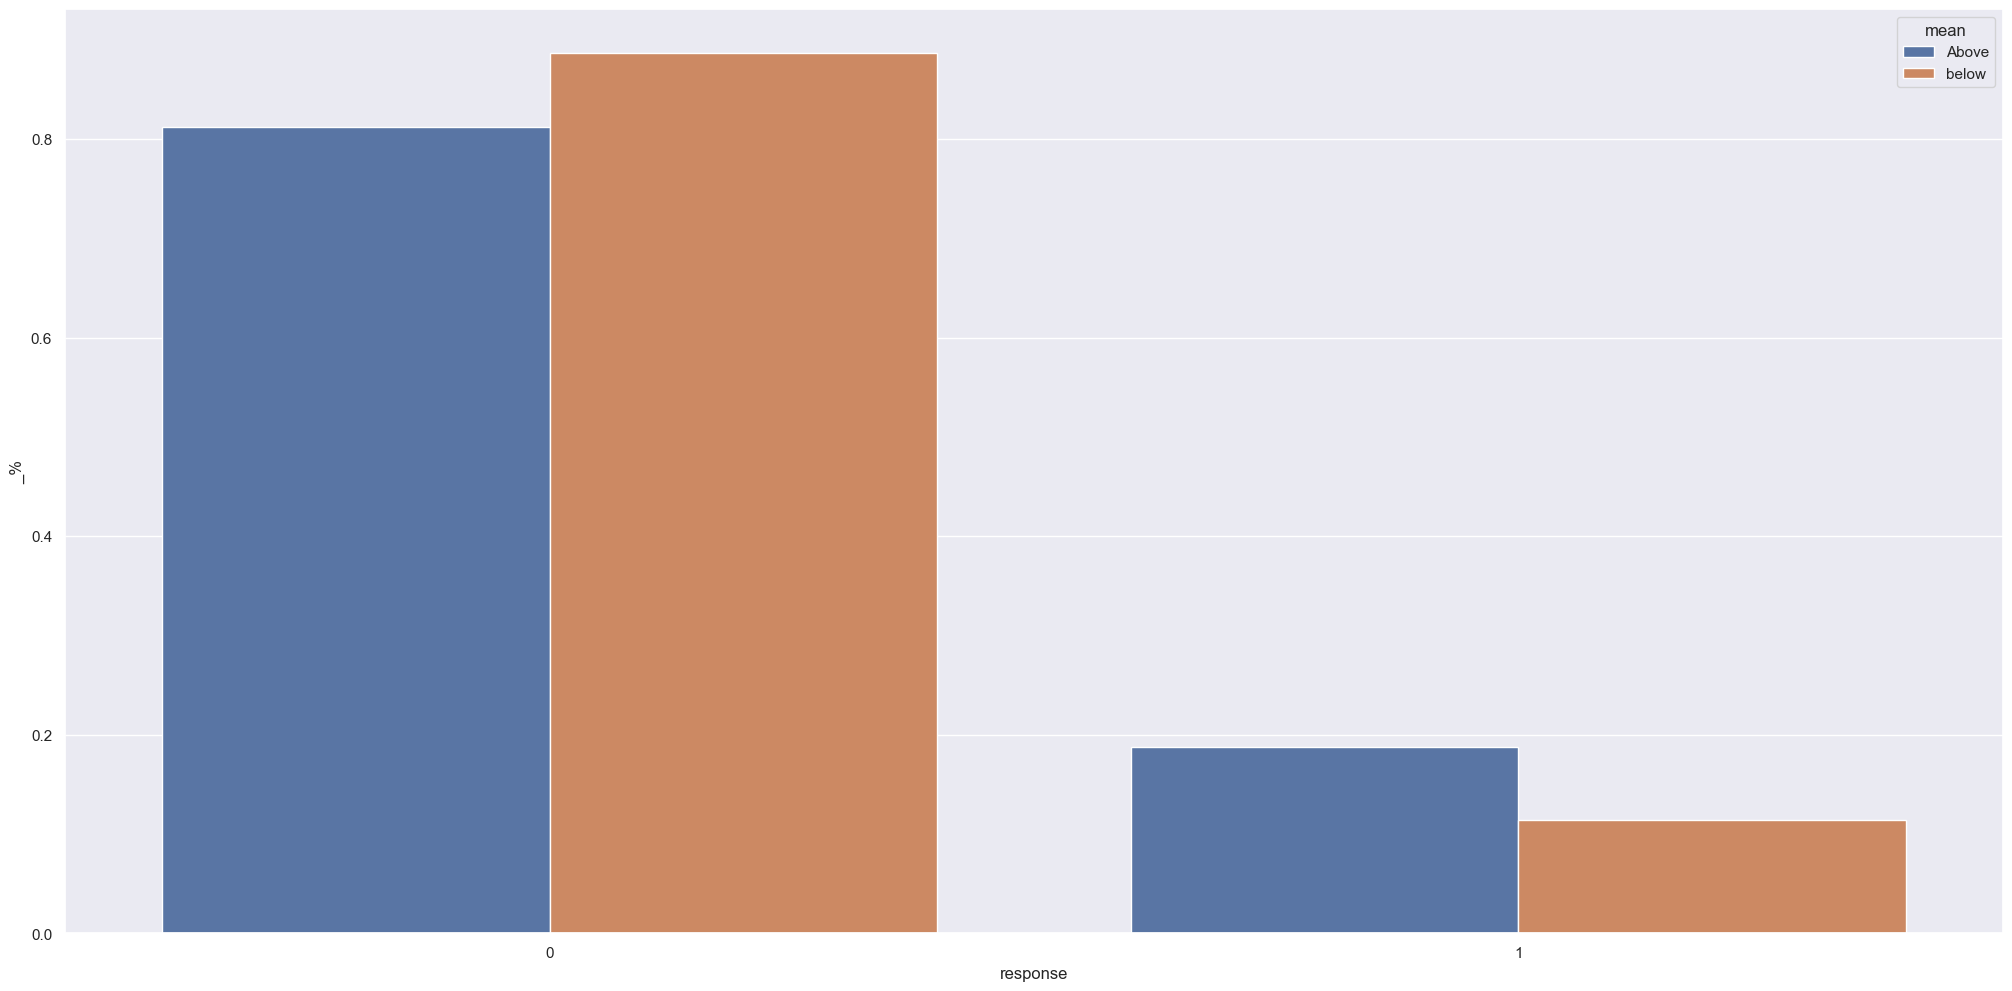

In [40]:
sns.barplot(y='_%',x='response',hue='mean',data=h01)

In [41]:
h01

,mean,response,0,_%
0,Above,0,882,0.812155
1,Above,1,204,0.187845
2,below,0,991,0.886404
3,below,1,127,0.113596


**Falso, dos clientes com renda acima da média 18,8 % respondem positivo a ofertar, enquanto dos abaixo 11,3 % o que é apenas 1,66 vezes acima**

### h02:Clientes com idade abaixo da média respodem sim a pesquisa 2 vezes mais que clientes mais velhos


In [42]:
#criando dataframe com os dados significantes para a hipotese
h02 = df3[['age','response']]

#média da renda
mean_age = h02['age'].mean()

#coluna com identificação de renda abaixo e acima da média
h02['mean'] = h02['age'].apply(lambda x: 'Above' if x > mean_age else 'below')

# agrupando e somando os variavle por valores acima e abaixo da média e por resposta negativa e positiva
h02 = h02.groupby(['mean','response']).size().reset_index()

#soma total da contagem de valores de resposta acima da média
above_total = h02[h02['mean']=='Above'][0].sum()
#soma total da contagem de valores de resposta abaixo da média
below_total = h02[h02['mean']=='below'][0].sum()
#fução auxiliar para calcular a porcentagem
aux_func = lambda x: x[0]/above_total if x['mean'] == 'Above' else x[0]/below_total if x['mean'] == 'below' else 0

#aplicando a função
h02['_%'] = h02.apply(aux_func,axis=1)

<AxesSubplot: xlabel='response', ylabel='_%'>

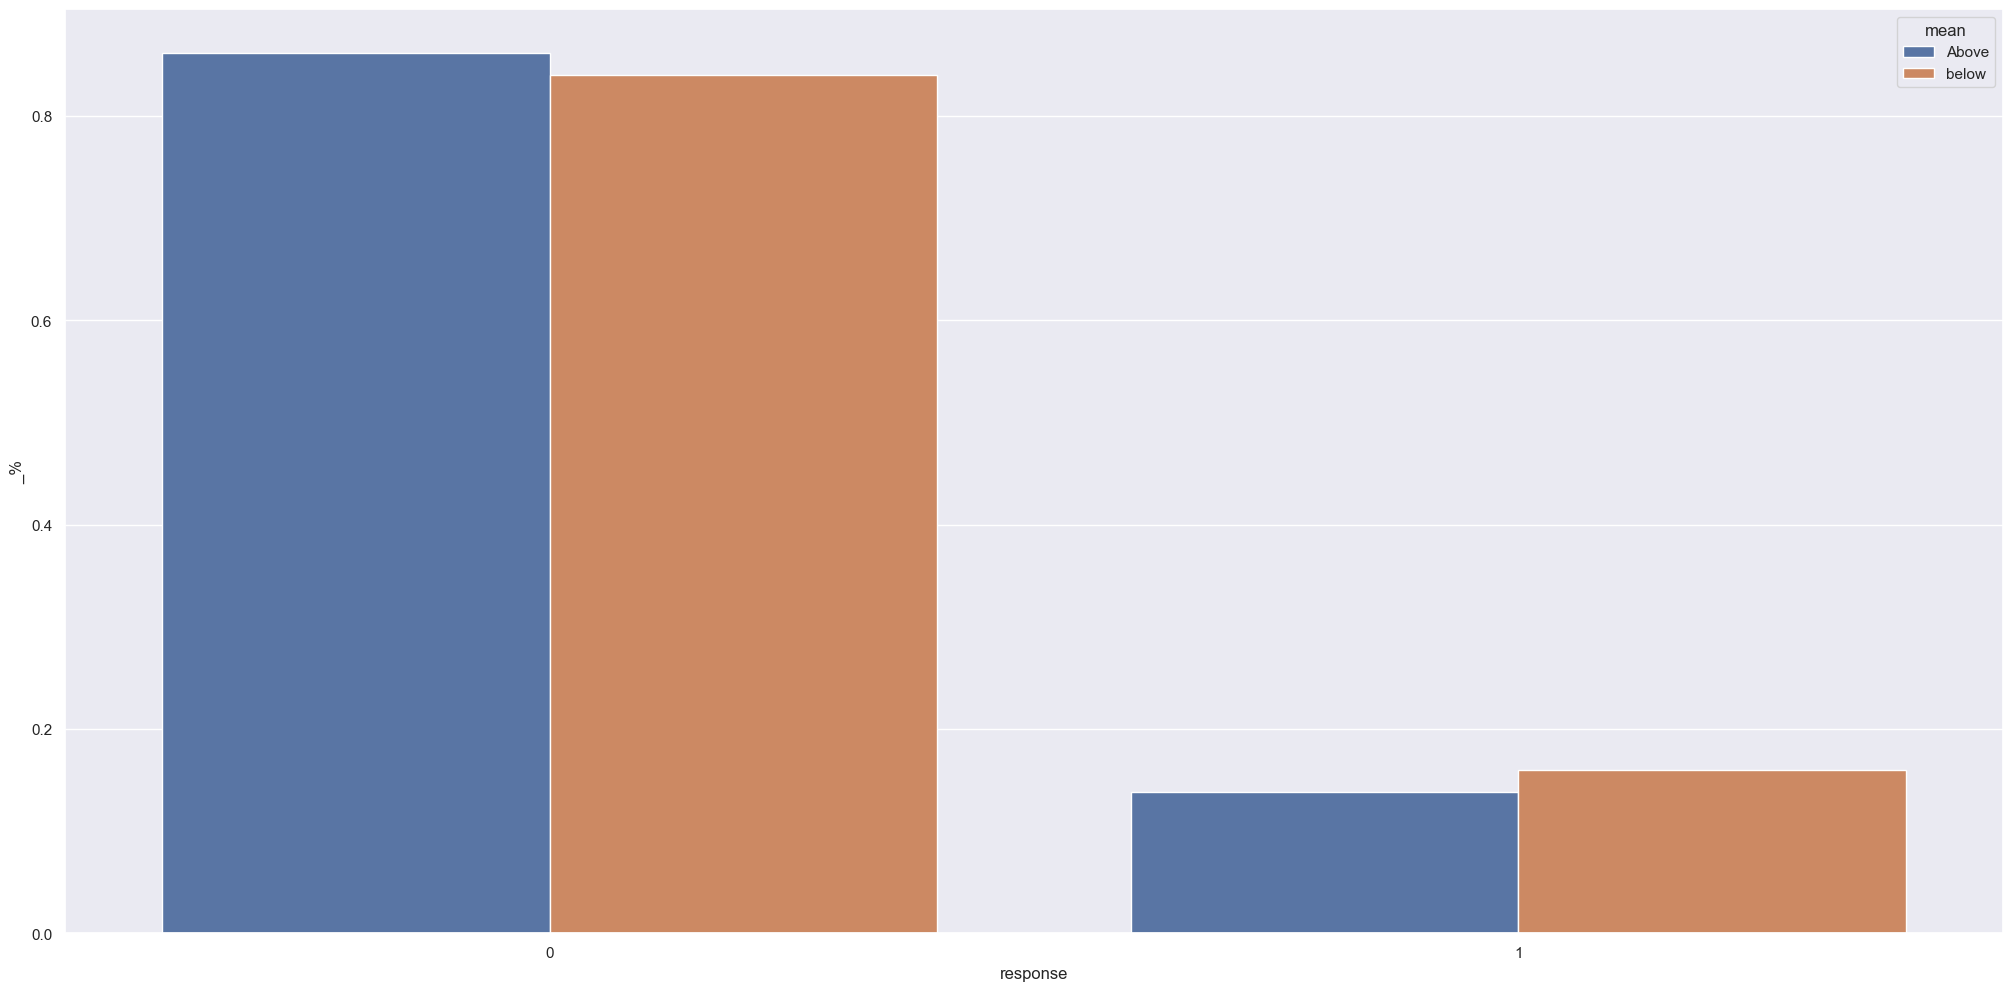

In [43]:
sns.barplot(y='_%',x='response',hue='mean',data=h02)

In [44]:
h02

,mean,response,0,_%
0,Above,0,853,0.861616
1,Above,1,137,0.138384
2,below,0,1020,0.840198
3,below,1,194,0.159802


**Falso, dos clientes com idade abaixo da média quase 16 % respondem sim a oferta, enquanto dos que tem idade acima da média 13,9 % respoderam que sim, sendo apenas 1,15 vezes mais**

### h03:Clientes com salário acima do 70 percentil e idade abaixo do 30 percentil repondem sim a pesquisa em 70% das vezes

In [45]:
#criando dataframe com os dados significantes para a hipotese
h03 = df3[['income','age','response']]

h03 = h03[h03['income'] > h03['income'].quantile(0.70)]
h03 = h03[h03['age'] < h03['age'].quantile(0.30)]

In [46]:
h03['response'].value_counts(normalize=True)

0    0.705882
1    0.294118
Name: response, dtype: float64

**Falso, clientes com essas caracteristicas respondem sim a ofertar apenas 29,4% das vezes**

### h04:clientes solteiros e divorciados respondem sim a pesquisa 1,5 vezes mais que aqueles casados

In [47]:
#criando dataframe com os dados significantes para a hipotese
h04 = df3[['marital_status','response']]

no_partner = h04[h04['marital_status'].isin(['Single','Divorced','Widow'])]
with_partner = h04[~h04['marital_status'].isin(['Single','Divorced','Widow'])]

In [48]:
no_partner['response'].value_counts(normalize=True)

0    0.778636
1    0.221364
Name: response, dtype: float64

In [49]:
with_partner['response'].value_counts(normalize=True)

0    0.888577
1    0.111423
Name: response, dtype: float64

**Falso, dos clientes sem parceiros 22,1% respondem sim a ofertar, enquanto dos com parceiros 11,1% respodem sim, sendo 1,99 vezes mais**

### **h05: Clientes com reclamações respondem sim as questionário 50% menos**

In [50]:
#criando dataframe com os dados significantes para a hipotese
h05 = df3[['complain','response']]

# agrupando e somando os variavle por valores acima e abaixo da média e por resposta negativa e positiva
h05 = h05.groupby(['complain','response']).size().reset_index()

#soma total da contagem de valores de resposta acima da média
no_complain = h05[h05['complain']==0][0].sum()
#soma total da contagem de valores de resposta abaixo da média
with_complain = h05[h05['complain']==1][0].sum()
#fução auxiliar para calcular a porcentagem
aux_func = lambda x: x[0]/no_complain if x['complain'] == 0 else x[0]/with_complain if x['complain'] == 1 else 0

#aplicando a função
h05['_%'] = h05.apply(aux_func,axis=1)

In [51]:
h05

,complain,response,0,_%
0,0,0,1856,0.849817
1,0,1,328,0.150183
2,1,0,17,0.850000
3,1,1,3,0.150000


<AxesSubplot: xlabel='complain', ylabel='_%'>

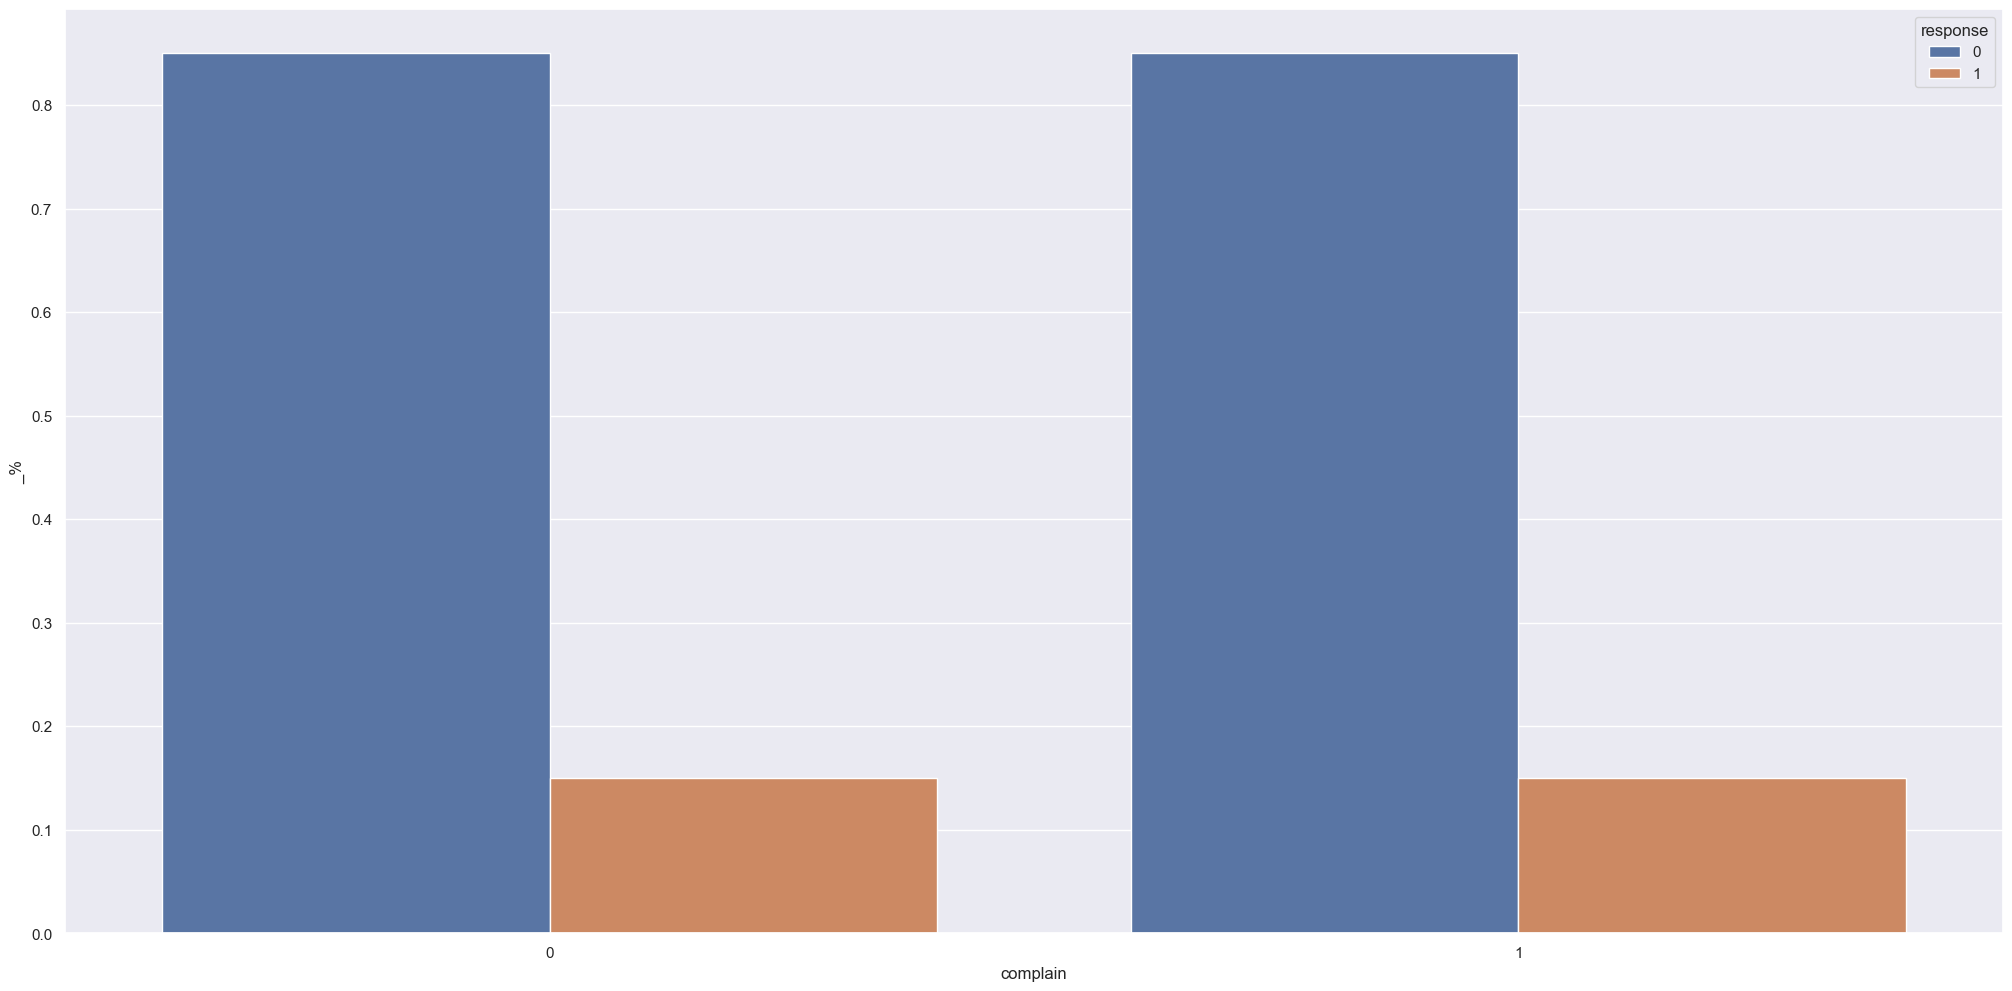

In [52]:
sns.barplot(y='_%',x='complain',hue='response',data=h05)

**Falso, em ambos os casos, dentre os clientes que tem reclamações e os que não tem, a resposta positiva se manteve em 15%**

### **h06: Clientes a mais de 1 anos na empresa respondem que sim 30% a mais que clientes novos**

In [53]:
#criando dataframe com os dados significantes para a hipotese
h06 = df3[['days_since_signup','response']]

#média da renda
two_years = 365

#coluna com identificação de renda abaixo e acima da média
h06['two_years'] = h06['days_since_signup'].apply(lambda x: 'old' if x > two_years else 'new')

# agrupando e somando os variavle por valores acima e abaixo da média e por resposta negativa e positiva
h06 = h06.groupby(['two_years','response']).size().reset_index()

#soma total da contagem de valores de resposta acima da média
old_total = h06[h06['two_years']=='old'][0].sum()
#soma total da contagem de valores de resposta abaixo da média
new_total = h06[h06['two_years']=='new'][0].sum()
#fução auxiliar para calcular a porcentagem
aux_func = lambda x: x[0]/old_total if x['two_years'] == 'old' else x[0]/new_total if x['two_years'] == 'new' else 0

#aplicando a função
h06['_%'] = h06.apply(aux_func,axis=1)


In [54]:
h06

,two_years,response,0,_%
0,new,0,1038,0.908932
1,new,1,104,0.091068
2,old,0,835,0.786252
3,old,1,227,0.213748


<AxesSubplot: xlabel='two_years', ylabel='_%'>

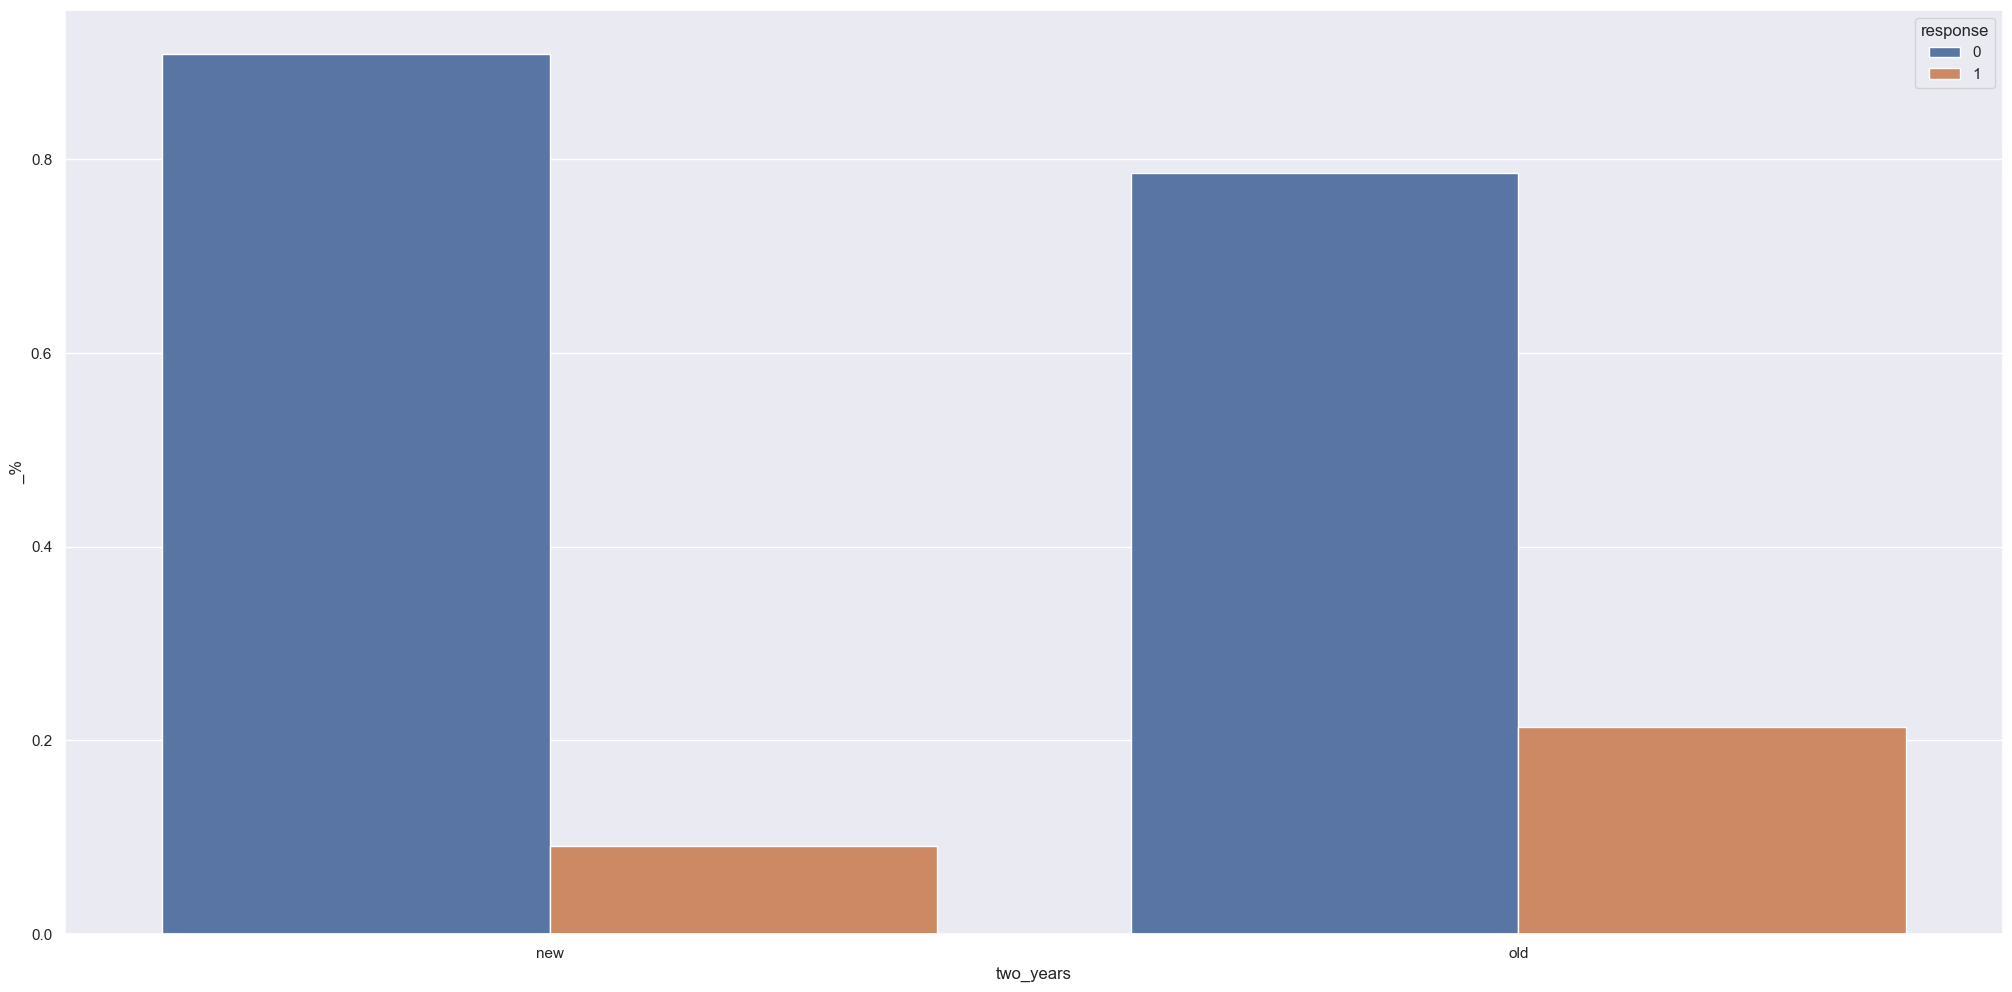

In [55]:
sns.barplot(y='_%',x='two_years',hue='response',data=h06)

**Falso, entre os clientes com mais de um ano cadastrados e os com menos, responsem positivamente a oferta 133% a mais**

### **h07: Clientes com numero de compras feitas pela internet maiores que em lojas físicas respondem sim 20% a mais**

In [56]:
#criando dataframe com os dados significantes para a hipotese
h07 = df3[['num_store_purchases', 'num_web_purchases','response']]

web_pur = h07[h07['num_web_purchases']>h07['num_store_purchases']]
store_pur = h07[h07['num_web_purchases']<h07['num_store_purchases']]

In [57]:
web_pur['response'].value_counts(normalize=True)

0    0.737705
1    0.262295
Name: response, dtype: float64

In [58]:
store_pur['response'].value_counts(normalize=True)

0    0.883193
1    0.116807
Name: response, dtype: float64

**Falso, dos clientes com compras pela internet 26,2%  respondem sim a oferta, já dos que comprar mais em lojas 11,7% respondem que sim a ofetar, ou seja, os clientes que compra mais pela internet respodem sim 136% a mais**

### **h08: Clientes com um total gasto maior que a mediana respodem a pesquisa 50% a mais**

In [59]:
#criando dataframe com os dados significantes para a hipotese
h08 = df3[['total_spent','response']]

#média da renda
median_spent = h08['total_spent'].median()

#coluna com identificação de renda abaixo e acima da média
h08['median'] = h08['total_spent'].apply(lambda x: 'Above' if x > median_spent else 'below')

# agrupando e somando os variavle por valores acima e abaixo da média e por resposta negativa e positiva
h08 = h08.groupby(['median','response']).size().reset_index()

#soma total da contagem de valores de resposta acima da média
above_total = h08[h08['median']=='Above'][0].sum()
#soma total da contagem de valores de resposta abaixo da média
below_total = h08[h08['median']=='below'][0].sum()
#fução auxiliar para calcular a porcentagem
aux_func = lambda x: x[0]/above_total if x['median'] == 'Above' else x[0]/below_total if x['median'] == 'below' else 0

#aplicando a função
h08['_%'] = h08.apply(aux_func,axis=1)

In [60]:
h08

,median,response,0,_%
0,Above,0,871,0.790381
1,Above,1,231,0.209619
2,below,0,1002,0.909256
3,below,1,100,0.090744


<AxesSubplot: xlabel='median', ylabel='_%'>

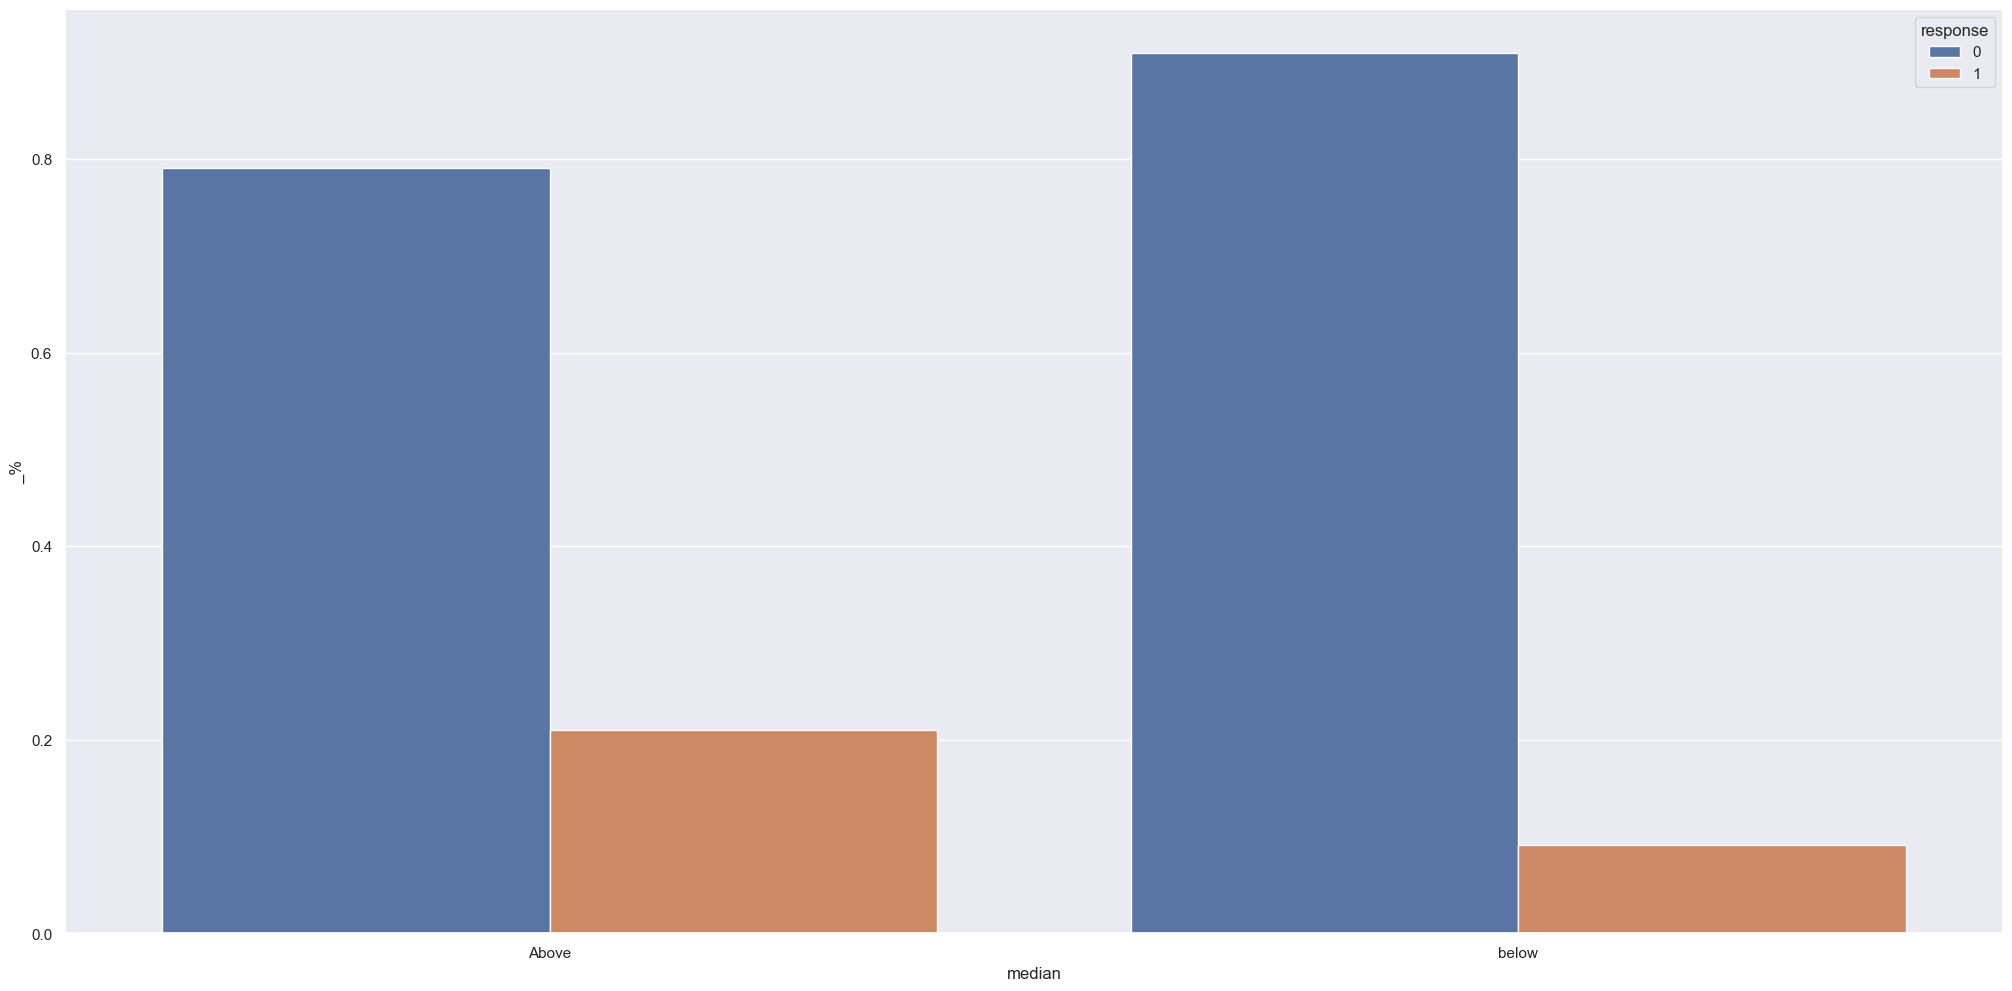

In [61]:
sns.barplot(y='_%',x='median',hue='response',data=h08)

**Falso, Clientes com um total gasto maior que a mediana respodem a ofertar 122% a mais**

### **h09: Clientes que recusaram as 3 primeiras ofertas respodem não ao questionário**

In [62]:
#criando dataframe com os dados significantes para a hipotese
h09 = df3[['accepted_cmp3','accepted_cmp1','accepted_cmp2','response']]
h09 = h09.loc[(h09['accepted_cmp3']==0) & (h09['accepted_cmp2']==0) & (h09['accepted_cmp1']==0),:]
h09

,accepted_cmp3,accepted_cmp1,accepted_cmp2,response
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2234,0,0,0,0
2235,0,0,0,0
2237,0,0,0,0
2238,0,0,0,0


In [63]:
h09['response'].value_counts(normalize=True)

0    0.901622
1    0.098378
Name: response, dtype: float64

Falso, dos Clientes que recusaram as 3 primeiras ofertas, 10%  ainda aceita a ofertar da pesquisa

### **h10: Clientes com 3 ou mais filhos respondem que não a oferta**

In [64]:
#criando dataframe com os dados significantes para a hipotese
h10 = df3[['n_sons','response']]
h10 = h10[h10['n_sons']>=3]


In [65]:
h10['response'].value_counts(normalize=True)

0    0.96
1    0.04
Name: response, dtype: float64

**Falso, dos Clientes com 3 ou mais filhos, 0.04% deles ainda responsen postitivamente a oferta**

### **h11: Clientes que 30% dos gastos deles correspondem a produtos 'gold' respodem que sim a oferta 1,5 vezes mais**

In [66]:
#criando dataframe com os dados significantes para a hipotese
h11 = df3[['mnt_gold_prods','total_spent', 'response']]

h11['gold_vs_spent'] = h11.apply(lambda x: 'above' if x['mnt_gold_prods'] / x['total_spent'] >= 0.3 else 'below', axis=1)

# agrupando e somando os variavle por valores acima e abaixo da média e por resposta negativa e positiva
h11 = h11.groupby(['gold_vs_spent','response']).size().reset_index()

#soma total da contagem de valores de resposta acima da média
above_total = h11[h11['gold_vs_spent']=='above'][0].sum()
#soma total da contagem de valores de resposta abaixo da média
below_total = h11[h11['gold_vs_spent']=='below'][0].sum()
#fução auxiliar para calcular a porcentagem
aux_func = lambda x: x[0]/above_total if x['gold_vs_spent'] == 'above' else x[0]/below_total if x['gold_vs_spent'] == 'below' else 0

#aplicando a função
h11['_%'] = h11.apply(aux_func,axis=1)

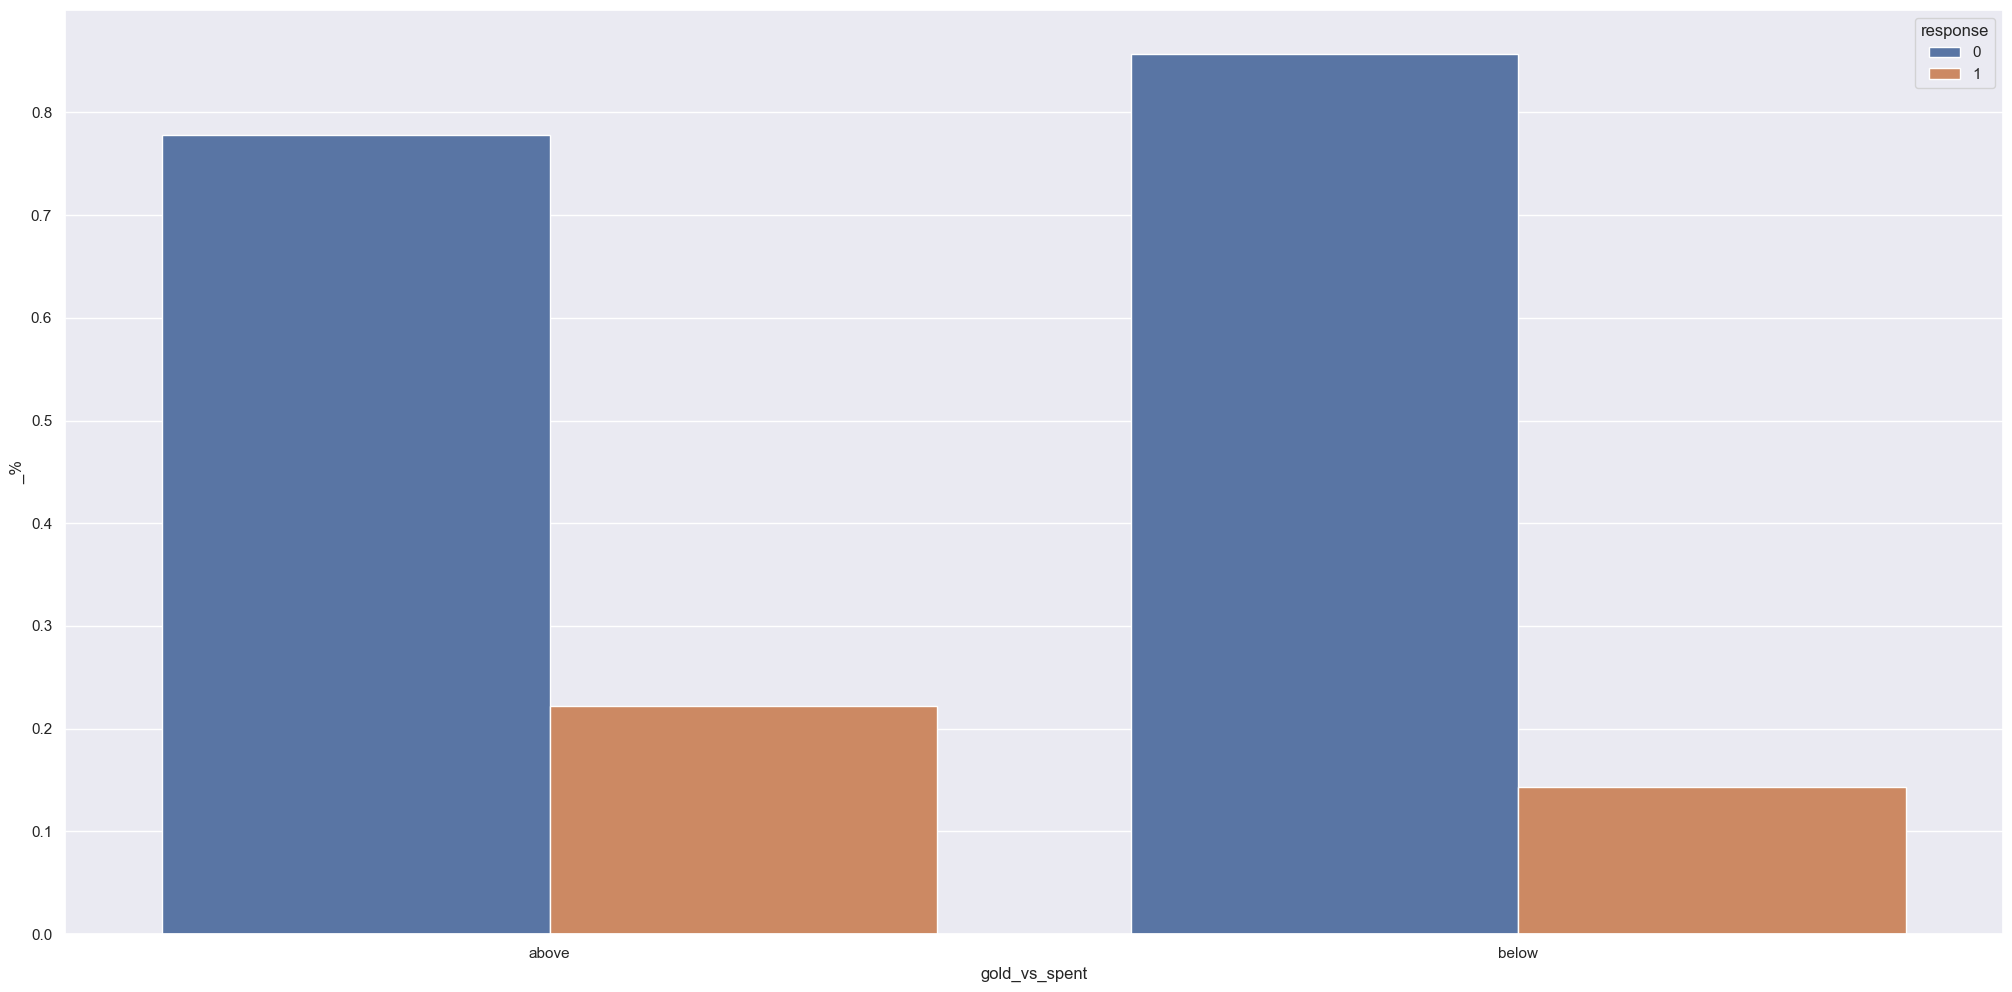

In [67]:
sns.barplot(y='_%',x='gold_vs_spent',hue='response',data=h11);

In [68]:
h11

,gold_vs_spent,response,0,_%
0,above,0,154,0.777778
1,above,1,44,0.222222
2,below,0,1719,0.856929
3,below,1,287,0.143071


**Verdadeiro, dos clientes cujo gasto em produtos gold corresponde a 30 % dos gastos total, respondem sim a pesquisa 1,55 vezes a mais que aqueles que não tem essse montante em produtos gold**

### **h12: Clientes que tem aceitaram a oferta de 3 a 4 vezes responderam sim a última campanha 2 vezes mais que aqueles que menos aceitaram**

In [69]:
#criando dataframe com os dados significantes para a hipotese
h12 = df3[['total_accepted','response']]

#separando os valores em abaixo de 3 aceites e de 3 adiante
h12_a =  h12[h12['total_accepted']>=3]
h12_b =  h12[h12['total_accepted']<3]

In [70]:
h12_a['response'].value_counts(normalize=True)

1    0.818182
0    0.181818
Name: response, dtype: float64

In [71]:
h12_b['response'].value_counts(normalize=True)

0    0.866915
1    0.133085
Name: response, dtype: float64

**Falso, enquanto dos que aceitaram 3 ou mais ofertar 18,1% respoderam que sim a última oferta, os que aceitaram menos de 3 respoderam 13,5 % das vezes, tendo um aumento de apenas 35%**

### **h13: clientes que o total gastos em produtos está acima do 90 percentil representam 50% das resposta positivas**

In [72]:
h13 = df3[['total_spent','response']]

h13_a = h13[h13['total_spent']>=h13['total_spent'].quantile(.90)]

In [73]:
h13_a['response'].value_counts()

0    126
1     96
Name: response, dtype: int64

In [74]:
h13['response'].value_counts()

0    1873
1     331
Name: response, dtype: int64

**Falso, dos que tem um total de gastos acima do 90 percentil, representam apenas 29% das respostas positivas**

# 4.3 Multivariate analysis

## 4.3.1 Categorical correlation

<AxesSubplot: >

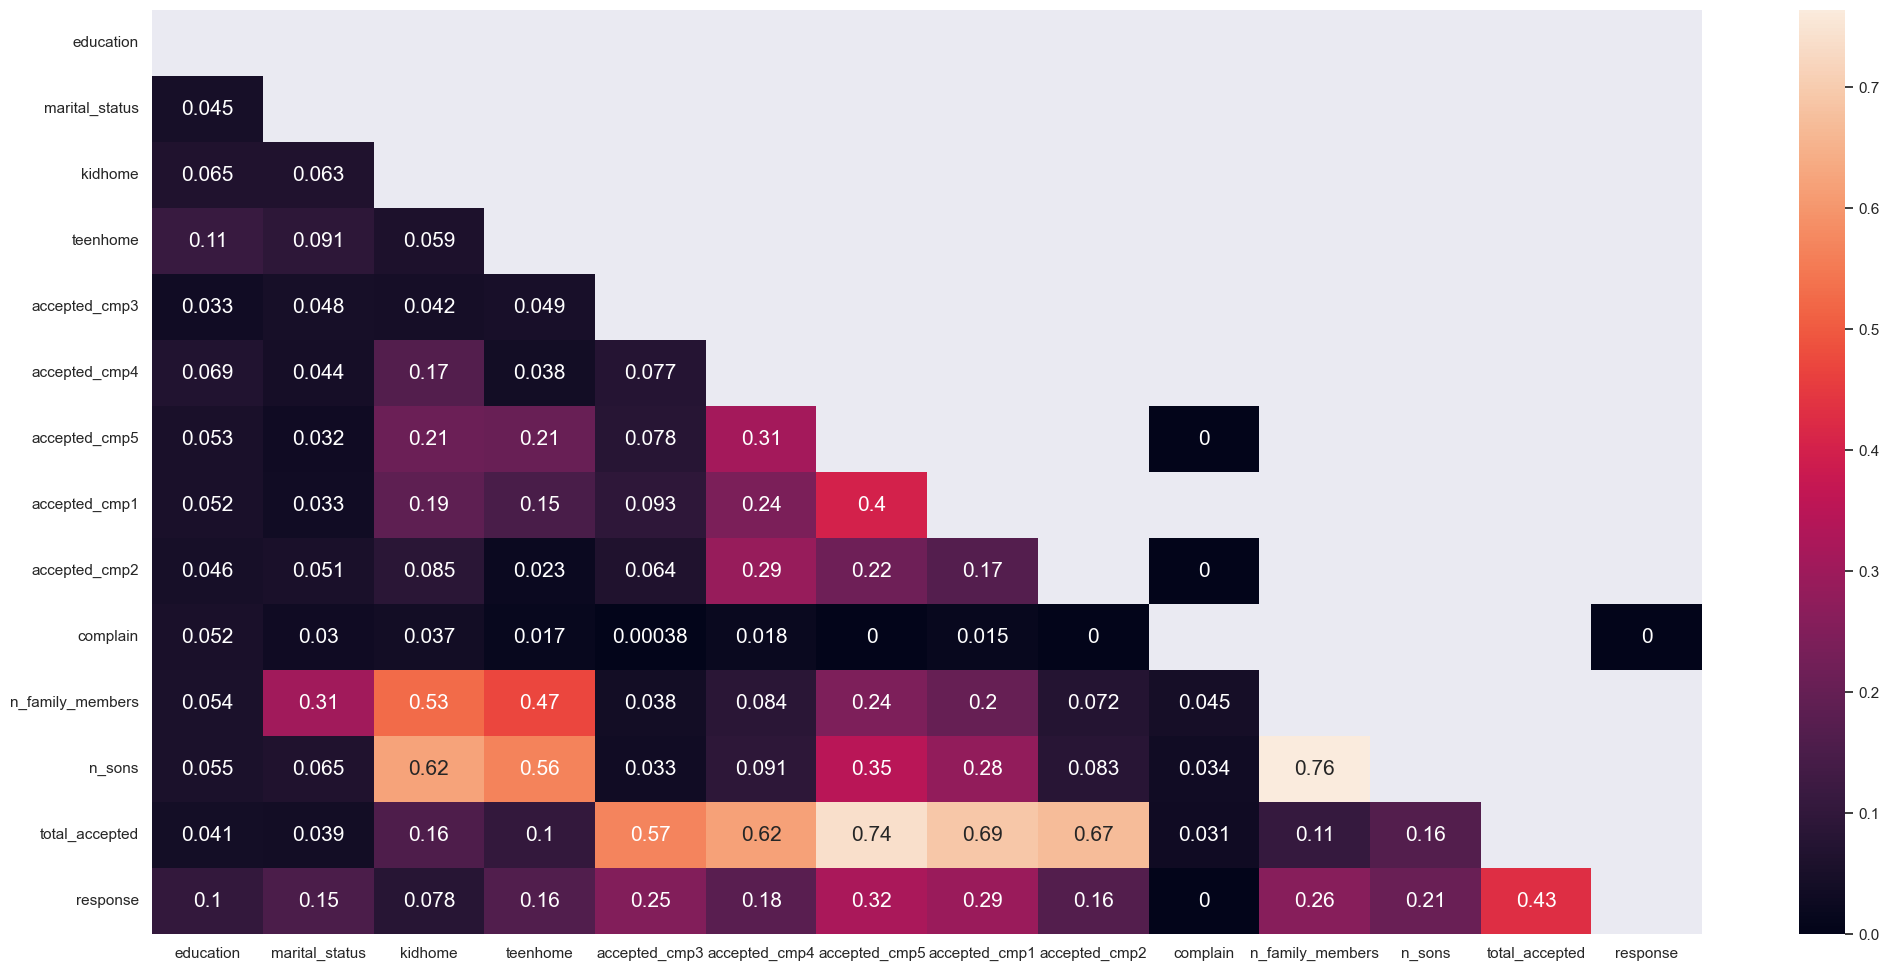

In [75]:
#lista de variáveis numericas comforme o pandas profile
cat_list = ['education','marital_status','kidhome','teenhome','accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
             'accepted_cmp2', 'complain','n_family_members', 'n_sons','total_accepted','response']

cat = df3[cat_list]

cat_dic = {}


for c1 in cat_list:
    for c2 in cat_list:
        v = cramer_v(cat[c1], cat[c2])

        if cat_list.index(c2) == 0:
            cat_dic[c1] = []
            cat_dic[c1].append(v)

        else:
            cat_dic[c1].append(v)


cramer_v_table = pd.DataFrame(cat_dic)
cramer_v_table.set_index(cramer_v_table.columns, inplace=True)

matrix = np.triu(cramer_v_table)
sns.heatmap(cramer_v_table, annot=True,mask=matrix,annot_kws={'size': 15})

In [76]:
cramer_v_table['response'].sort_values()

complain            0.000000
kidhome             0.078002
education           0.102201
marital_status      0.150028
teenhome            0.162586
accepted_cmp2       0.164388
accepted_cmp4       0.178470
n_sons              0.206623
accepted_cmp3       0.252514
n_family_members    0.262297
accepted_cmp1       0.292392
accepted_cmp5       0.320535
total_accepted      0.427254
response            0.998449
Name: response, dtype: float64

## 4.3.2 Numerical x categorical correlation

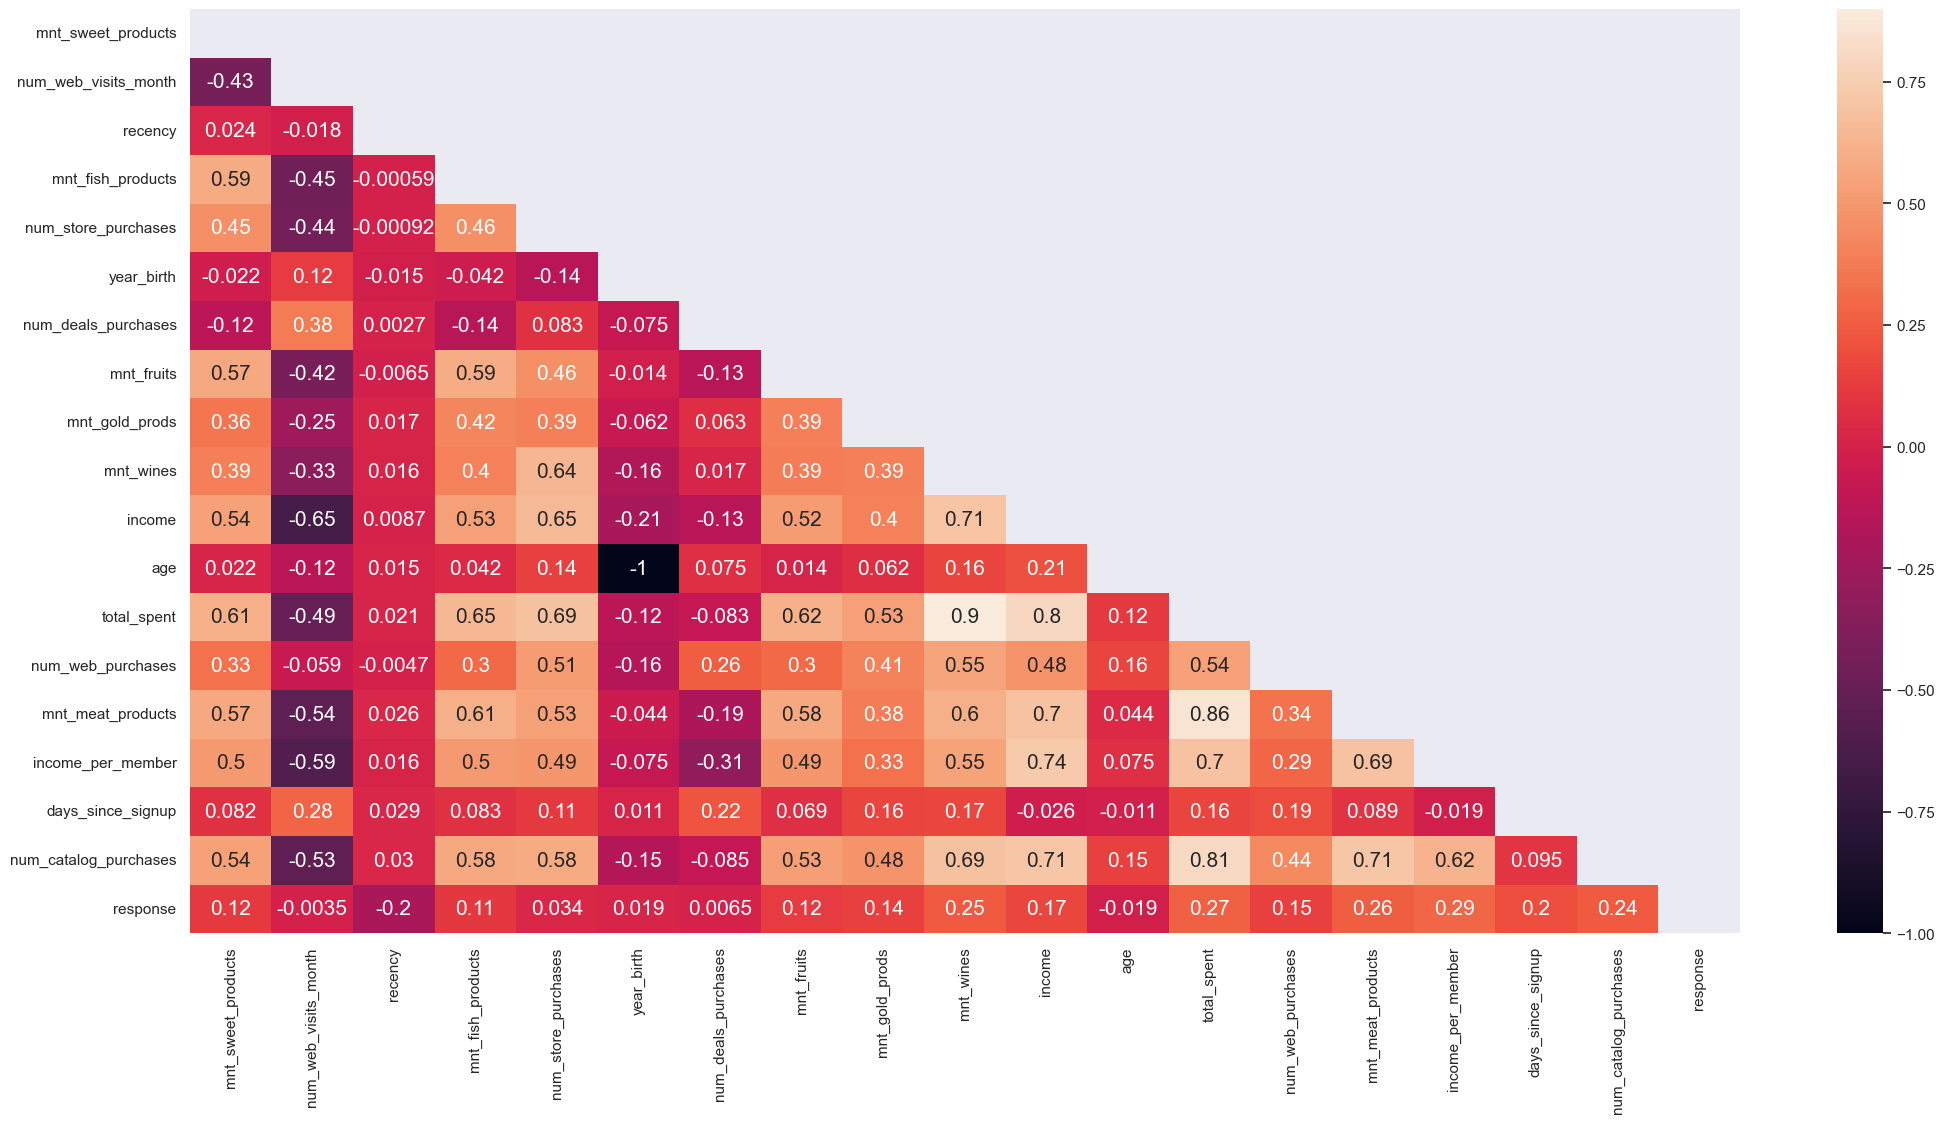

In [77]:
#lista de variáveis numericas comforme o pandas profile
num_list = ['mnt_sweet_products','num_web_visits_month',
             'recency','mnt_fish_products',
             'num_store_purchases','year_birth',
             'num_deals_purchases','mnt_fruits',
             'mnt_gold_prods','mnt_wines',
             'income','age',
             'total_spent','num_web_purchases',
             'mnt_meat_products','income_per_member',
             'days_since_signup','num_catalog_purchases','response']

num = df3[num_list]

num_dic = {}

for c1 in num_list:
    for c2 in num_list:
        v = stats.pointbiserialr(num[c1],num[c2])[0]

        if num_list.index(c2) == 0:
            num_dic[c1] = []
            num_dic[c1].append(v)

        else:
            num_dic[c1].append(v)


point_b_table = pd.DataFrame(num_dic)
point_b_table.set_index(point_b_table.columns, inplace=True)

matrix = np.triu(point_b_table)
sns.heatmap(point_b_table, annot=True,mask=matrix,annot_kws={'size': 15});

In [78]:
point_b_table['response'].sort_values()

recency                 -0.200230
age                     -0.018884
num_web_visits_month    -0.003486
num_deals_purchases      0.006548
year_birth               0.018884
num_store_purchases      0.034016
mnt_fish_products        0.106170
mnt_sweet_products       0.115506
mnt_fruits               0.121786
mnt_gold_prods           0.137874
num_web_purchases        0.149772
income                   0.166190
days_since_signup        0.195164
num_catalog_purchases    0.240194
mnt_wines                0.245932
mnt_meat_products        0.255374
total_spent              0.266839
income_per_member        0.290673
response                 1.000000
Name: response, dtype: float64

# 5.0 Data preparation 

In [79]:
df4 = df3.copy()

## 5.1 Filter 

**Filtragem dos valores de acordo com a eda**

In [180]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df4.drop(labels=["id"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 182 duplicates in your database.


In [181]:
df4 = df4[~df4.drop(labels=["id"], axis=1).duplicated()]

In [80]:
#rows
# foram filtradas durante o EDA para não atrapalhar a analise bivariada


# columns
df4 = df4.drop(columns=['year_birth','dt_customer','z_cost_contact', 'z_revenue'])

## 5.2 Rescaling

In [81]:
mms =  MinMaxScaler()

lista = ['mnt_sweet_products',
 'num_web_visits_month',
 'recency',
 'mnt_fish_products',
 'num_store_purchases',
 'num_deals_purchases',
 'mnt_fruits',
 'mnt_gold_prods',
 'mnt_wines',
 'income',
 'age',
 'total_spent',
 'num_web_purchases',
 'mnt_meat_products',
 'income_per_member',
 'days_since_signup',
 'num_catalog_purchases']

for item in lista:
    df4[item] = mms.fit_transform(df4[[item]])
    pickle.dump(mms,open(path_local + 'src/features/' + item + '_scaler.pkl','wb'),protocol=pickle.HIGHEST_PROTOCOL)

## 5.3 Encoding

In [82]:
#frequêncy encoding
freq_edu = np.round_(df4['education'].value_counts(normalize=True),2).to_dict()
df4['education'] = df4['education'].map(freq_edu)

#frequêncy encoding
freq_mari = np.round_(df4['marital_status'].value_counts(normalize=True),2).to_dict()
df4['marital_status'] = df4['marital_status'].map(freq_mari)

In [83]:
df4

,id,education,marital_status,income,kidhome,teenhome,recency,mnt_wines,mnt_fruits,mnt_meat_products,...,accepted_cmp2,complain,age,n_family_members,n_sons,days_since_signup,income_per_member,total_spent,total_accepted,response
0,5524,0.50,0.21,0.351086,0,0,0.585859,0.425318,0.442211,0.554878,...,0,0,0.696429,1,0,0.948498,0.373613,0.639683,0,1
1,2174,0.50,0.21,0.277680,1,1,0.383838,0.007368,0.005025,0.006098,...,0,0,0.750000,3,2,0.161660,0.094444,0.008730,0,0
2,4141,0.50,0.26,0.434956,0,0,0.262626,0.285332,0.246231,0.129065,...,0,0,0.553571,2,0,0.446352,0.227577,0.305952,0,0
3,6182,0.50,0.26,0.155079,1,0,0.262626,0.007368,0.020101,0.020325,...,0,0,0.214286,3,1,0.198856,0.051506,0.019048,0,0
4,5324,0.22,0.39,0.352051,1,0,0.949495,0.115874,0.216080,0.119919,...,0,0,0.267857,3,1,0.230329,0.120491,0.165476,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0.50,0.39,0.370288,0,1,0.464646,0.474883,0.216080,0.184959,...,0,0,0.517857,3,1,0.545064,0.126878,0.530159,0,0
2236,4001,0.22,0.26,0.387659,2,1,0.565657,0.271936,0.000000,0.030488,...,0,0,0.892857,5,3,0.027182,0.077146,0.174206,1,0
2237,7270,0.50,0.10,0.343885,0,0,0.919192,0.608171,0.241206,0.220528,...,0,0,0.267857,1,0,0.221745,0.366047,0.490476,1,0
2238,8235,0.17,0.26,0.420217,0,1,0.080808,0.286671,0.150754,0.217480,...,0,0,0.714286,3,1,0.223176,0.144364,0.332540,0,0


In [84]:
salvando o dataframe
#df4.to_csv(path_local + 'data/processed/df4.csv',index=False)

SyntaxError: invalid syntax (2585272285.py, line 1)

# 6.0 Feature selection

## 6.1 load data

In [118]:
df5 = pd.read_csv(path_local + 'data/processed/df4.csv')

## 6.2 Split train and test

In [119]:
X = df5.copy()
y = X['response']
X = X.drop(columns=['id','response'])

In [120]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

## 6.3 Boruta

In [121]:
# training and test datase for boruta
x_train_n = X_train.values
y_train_n = y_train.values.ravel()


# RandonForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

In [122]:
#define boruta
boruta = BorutaPy(rf,n_estimators='auto',verbose=2,random_state=42).fit(x_train_n,y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	24
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	25
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	25
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	25
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	25
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	26



In [123]:
cols_selected = boruta.support_.tolist()

x_train_fs = X_train
cols_selected_boruta = x_train_fs.iloc[:,cols_selected]

cols_not_selected_boruta = list(np.setdiff1d(x_train_fs.columns, cols_selected_boruta))

In [124]:
 cols_selected_boruta

,recency,days_since_signup,income_per_member,total_accepted
1131,0.727273,0.121602,0.248706,0
517,0.989899,0.161660,0.047227,0
1391,0.737374,0.220315,0.207564,0
53,0.636364,0.168813,0.115392,0
232,0.575758,0.869814,0.135495,0
...,...,...,...,...
1963,0.949495,0.656652,0.589637,4
1334,0.757576,0.689557,0.202077,0
1630,0.595960,0.892704,0.088157,0
1445,0.777778,0.543634,0.097593,0


## 6.4 Feature importance 

In [125]:
#define o modelo
etf = ExtraTreesClassifier(n_estimators=300,max_features='sqrt',random_state=42,n_jobs=-1)

In [126]:
#treino
etf.fit(x_train_n,y_train_n)

ExtraTreesClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [127]:
#lista com valores de importância
importances = etf.feature_importances_

In [128]:
#normalização dos valores
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        etf.estimators_],
                                        axis = 0)
indices = np.argsort(etf.feature_importances_)[::-1]

In [129]:
# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( X_train, etf.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
df = df.sort_values( 'importance', ascending=False )
df

Feature ranking:


,feature,importance
0,recency,0.068176
0,total_accepted,0.058466
0,days_since_signup,0.054903
0,accepted_cmp3,0.047059
0,income_per_member,0.045623
0,mnt_meat_products,0.041284
0,accepted_cmp5,0.040876
0,num_web_visits_month,0.040731
0,total_spent,0.039185
0,num_store_purchases,0.037880


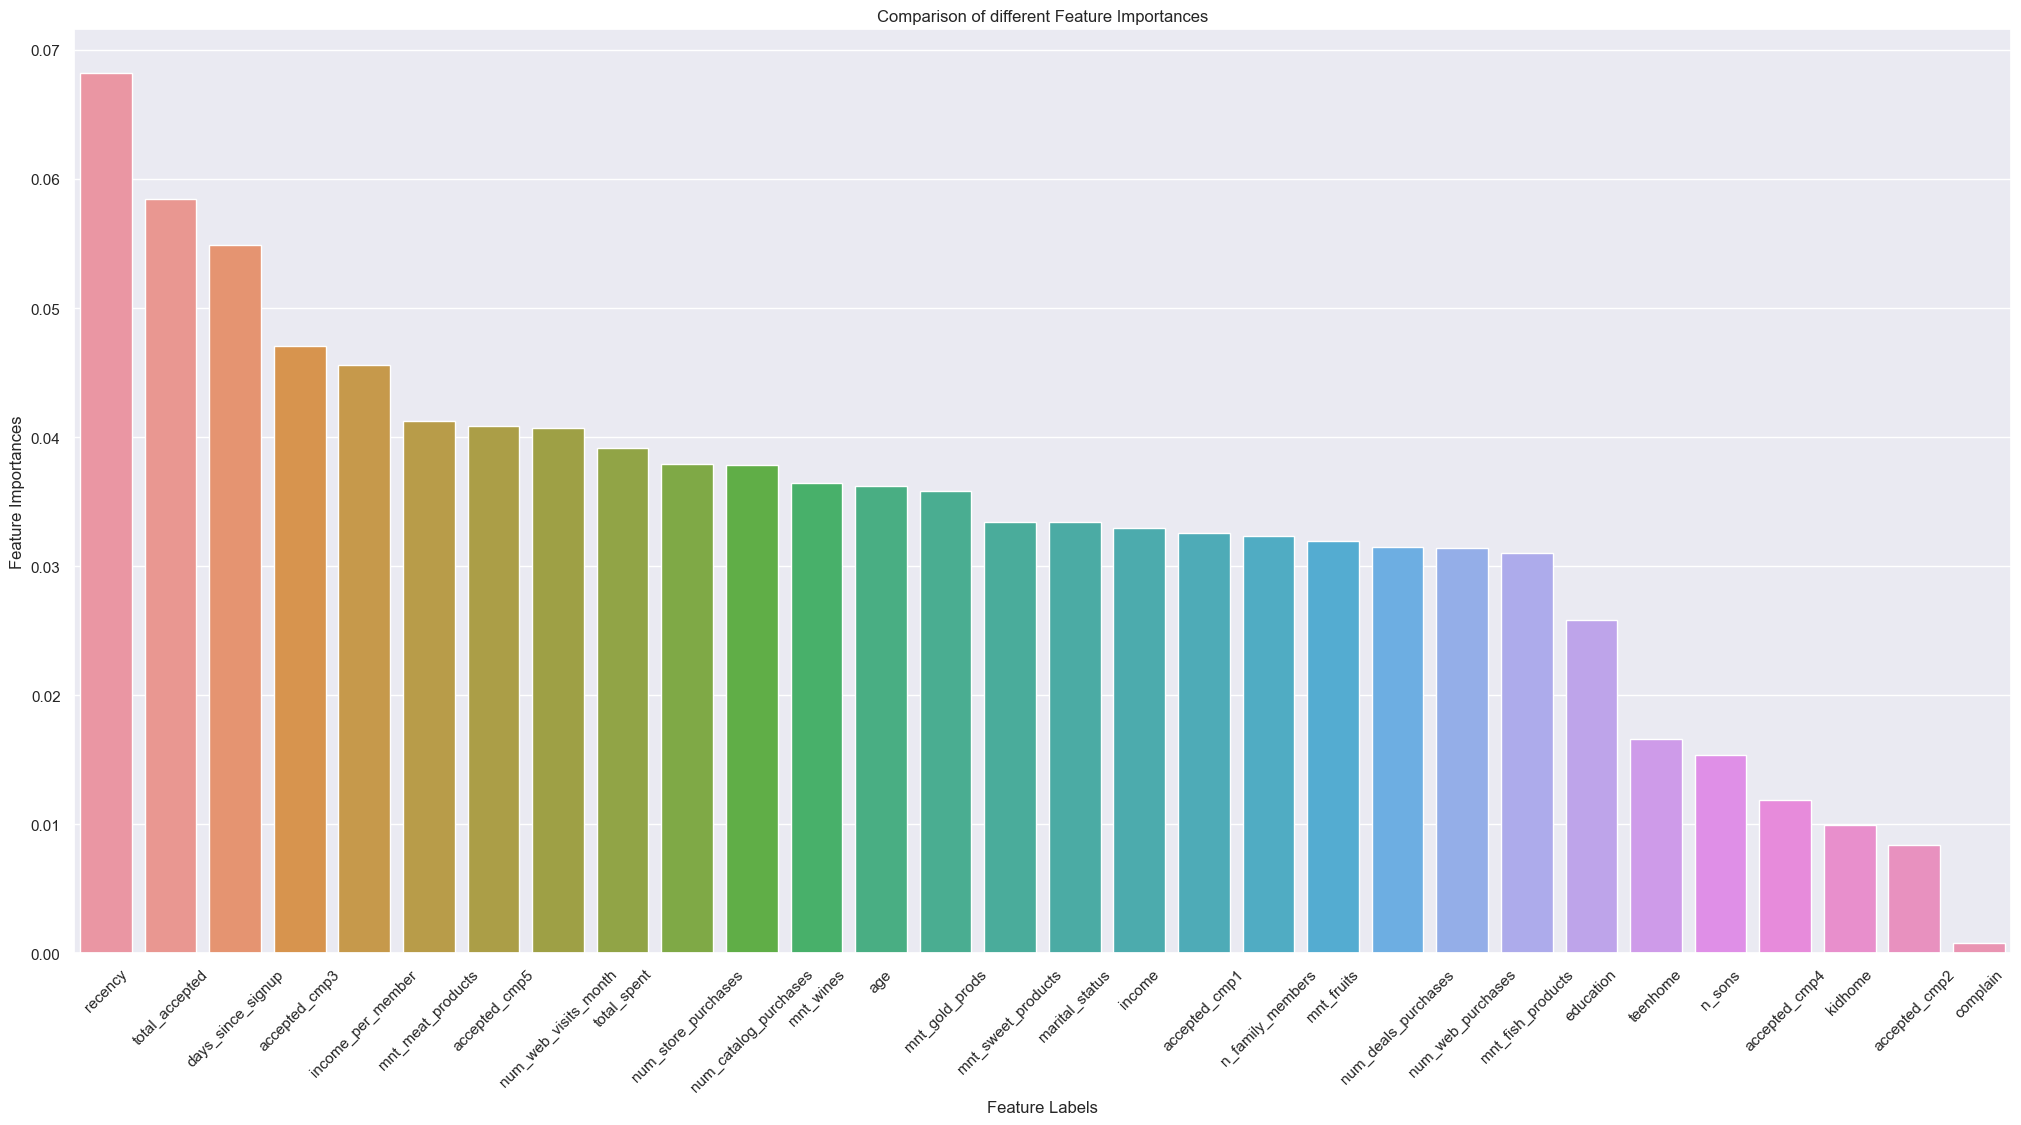

In [130]:
#plotando o gráfico
sns.barplot(x='feature',y='importance',data=df)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.xticks(rotation=45)
plt.show()

**Baseado no feature importance, boruta e EDA as colunas que no momento serão exluidas para etapa de machine learning serão**

In [131]:
cols_not_select = ['teenhome','kidhome','n_sons','accepted_cmp4','accepted_cmp2','complain','education']

In [132]:
df5 = df5.drop(columns=cols_not_select)

In [133]:
df5.head()

,id,marital_status,income,recency,mnt_wines,mnt_fruits,mnt_meat_products,mnt_fish_products,mnt_sweet_products,mnt_gold_prods,...,accepted_cmp3,accepted_cmp5,accepted_cmp1,age,n_family_members,days_since_signup,income_per_member,total_spent,total_accepted,response
0,5524,0.22,0.351086,0.585859,0.425318,0.442211,0.554878,0.664093,0.335878,0.274143,...,0,0,0,0.696429,1,0.948498,0.373613,0.639683,0,1
1,2174,0.22,0.277680,0.383838,0.007368,0.005025,0.006098,0.007722,0.003817,0.018692,...,0,0,0,0.750000,3,0.161660,0.094444,0.008730,0,0
2,4141,0.25,0.434956,0.262626,0.285332,0.246231,0.129065,0.428571,0.080153,0.130841,...,0,0,0,0.553571,2,0.446352,0.227577,0.305952,0,0
3,6182,0.25,0.155079,0.262626,0.007368,0.020101,0.020325,0.038610,0.011450,0.015576,...,0,0,0,0.214286,3,0.198856,0.051506,0.019048,0,0
4,5324,0.39,0.352051,0.949495,0.115874,0.216080,0.119919,0.177606,0.103053,0.046729,...,0,0,0,0.267857,3,0.230329,0.120491,0.165476,0,0


In [135]:
#df5.to_csv(path_local + 'data/processed/df5.csv',index=False)